In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression

warnings.filterwarnings('ignore')

class PandasHandler:
    """
    Handler for basic operations on dataframe pandas
    visualization, nan inspection and repair
    LOADING OF Dataframe
    load_csv(file_path, parse_dates=True):
    def get_df(self, columns=''):
    def get_train_test_df(self, target='', features='', split_percentage=0.2):
    def split_df(self, test_size=0.2, target_col):
    
    # Investigation
    def get_col_with_nan(self):
    def display_col_with_nan(self):
    def count_categories(self):
    def get_numeric_cols(self):
    def get_text_cols(self):    
    def get_categoric_cols(self):
    def get_percStdDev_data(self, colname, limit_percStdDev=1):
    def get_outliers(self, col):
    def get_iqr_outliers(self, col):
    def get_sigma_outliers(self, col):
    def get_density_outliers(self, selected_columns=None, epsilon=1.5, min_samples=5, metric='euclidean'):
    def get_df_variety(self, X=None, only_categorical=False):

    # Repair
    def repair_nan(self, colname=None, mode='value', value=0):
    def drop_row_with_nan_val(self, threshold=1,axis=0,inplace=True):
    def drop_col(self,colnames):
    def categories_threshold(self, threshold=5, under_threshold=True):
    def factorize_categories(self, columns=None):
    def remove_outliers(self, col, method='sigma', epsilon=1.5, min_samples=5, metric='euclidean'):
    def reduce_cat(self, col, values):

    # Add utility cols
    def standard_scaling(self, col1, col2):
    def normalize_scaling(self, col1, col2):
    def add_max_scaled_col(self,colname, group_by = '', prefix='max_scaled_'):
    def add_normalized_col(self,colname, prefix='normalized_'):
    def add_standard_col(self,colname, prefix='standard_'):
    def mean(self, colname, group_by='', addCol=False):
    def max(self, colname, group_by='', addCol=False):
    def min(self, colname, group_by='', addCol=False):
    def label_encode(self,columns=None):
    def onehot_encode(self, columns=None):

    # Visualization
    def plot_line(self, y='', x=''):
    def plot_distribution_line(self, col):
    def distribution(self, cols, num_subplots_perrow=3):
    def scatter(self, colx, coly, num_subplots_perrow=3, limit_percStdDev=1):
    def correlations(self, annotation=True, limit=0):
    def correlations(self, df=None, annotation=True, limit=0):
    def boxplot_outliers(self, col):
    def pairplot_relations(self):
    def features_importance(self, X=None, y=None, n_features_to_vis=25):

    
    """
        
    def __init__(self, data=None):
        self.df = None
        if data is not None:
            self.df = pd.DataFrame(data)
            self.cols_containing_NaN = self._get_columns_with_nan()
    
        self.features = None
        self.target = None
        self.X = self.df
        self.y = None
    
    def _get_columns_with_nan(self):
        return self.df.columns[self.df.isna().any()].tolist()

    def get_X(self):
        return self.X
        
    def get_y(self):
        return self.y
        
    def set_features(self, features):
        self.features = features
        return
        
    def set_target(self, target):
        self.target = target
        self.features.pop(self.features.index(target))
        self.X = self.df
        self.y = self.X.pop(target)
        return

    def get_df_variety(self, X=None, only_categorical=False):
        """Gets the count of group by field of every field of the ds"""
        if X is None:
            X = self.df
        
        row_count = X.shape[0]
        print(f'Total rows: {row_count}')
        
        for col in X.columns:
            if X[col].dtype == 'object' or X[col].dtype == 'category':
                counts = X.groupby(col)[col].count()
                percentages = (counts / counts.sum()) * 100
                
                counts = counts.apply(np.floor).astype(int)
                percentages = percentages.apply(np.floor).astype(int)
    
                print(f'\nColonna: {col}')
                print(f'{"Nome Campo":<15} {"Conteggi":<10} {"Percentuale":<12}')
                for name, count, percent in zip(counts.index, counts, percentages):
                    print(f'{name:<15} {count:<10} {percent:<12}')        
            else:
                print(f'{"Nome Campo":<15} {"Conteggi":<10} {"Percentuale":<12}')
                counts = X[col].notnull().count()
                percent = counts/row_count
                print(f'{col:<15} {counts:<10} {percent:<12}')        
                
                    
        return

    def reduce_cat(self, X=None,  dictionary=None):
        """Assigns Other if the value in col is not in values"""
        if X is None:
            X = self.df
        other_val = 'Other'
        for col, values in dictionary.items():
            if col in X.columns: 
                X[col] = X[col].apply(lambda x: x if x in values else other_val)
        
        return
        
    
    def print_numbercols_notzero(self, X=None):
        """Prints all numeric cols with their count>0"""        

        if X is None:
            X = self.df
        cols = X.select_dtypes(include=['number'])

        for col in cols:
            print(f'Counts for {col}--> {X[X[col]>0][col].count()}')


    
    def isolate_features(self, X=None, features=None, target=None):
        """Isolates the features of a dataframe"""        

        if X is None:
            X = self.df
        
        if features is None:
            features = X.columns.tolist()  # Converti in lista se None
        
        if isinstance(features, str):
            features = [features]  # Trasforma in lista se è una stringa
        
        # Controllo se tutte le caratteristiche specificate esistono in X
        missing_features = [feature for feature in features if feature not in X.columns]
        if missing_features:
            raise ValueError(f"Le seguenti colonne non esistono nel DataFrame: {missing_features}")
        
        if target is not None:
            self.set_target(target)
            # Estrai il target e rimuovilo da X
            if target in X.columns:
                self.y = X.pop(target)
            else:
                raise ValueError(f"La colonna target '{target}' non esiste nel DataFrame.")
        
        self.set_features(features)
        
        # Isola solo le colonne specificate e modifica direttamente X
        for column in X.columns:
            if column not in features:
                del X[column]  # Rimuovi le colonne non specificate
        
        self.X = X  # Aggiorna self.X con il DataFrame modificato

    
    
    def get_df(self, columns=''):
        """Gets the dataframe"""
        if not columns:
            return self.df
        else:
            return self.df[columns]

    def split_df(self , target_col, test_size=0.2):
        """Splits the df in X and y for test and train"""
        X = self.df.copy()
        y = X.pop(target_col)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size, random_state=42)        
        return X_train, y_train, X_test, y_test
    

    def get_train_test_df(self, target=None, features=None, split_percentage=0.2):
        """Gets the pairs X, y for training and test"""
        if target is not None and target not in self.df.columns:
            raise ValueError(f"Target '{target}' not found in DataFrame.")
        
        train_df, test_df = train_test_split(
            self.df, 
            test_size=split_percentage, 
            random_state=42, 
        )        
        
        if target is not None:
            y_train = train_df.pop(target)
            y_test = test_df.pop(target)
        else:
            y_train = []  # o pd.Series(dtype='float')
            y_test = []   # o pd.Series(dtype='float')

        if features is None:
            features = self.df.columns.drop(target) if target else self.df.columns
            
        X_train = train_df[features]
        X_test = test_df[features]

        return X_train, y_train, X_test, y_test
        
    
    def get_col_with_nan(self, X=None):
        """Gets all column names with nan and lists them with counting"""
        if X is None:
            X = self.get_df()
            print(self._get_columns_with_nan())
            
        nan_columns = {}
        total = X.shape[0]
        
        for column in X.columns:
            nan_count = X[column].isnull().sum()
            if nan_count > 0:
                percentage = '{:.2f}'.format(nan_count*100 / total)
                nan_columns[column] = f'{nan_count} count, {percentage}% of total'
        
        return nan_columns
        
    def repair_nan(self, X=None, colname=None, mode='value', value=0):
        """
        Repair df where nan is found in columns 
        MODES: value, delrow, mostcommon, mean, min, max, random_number
        """
        if X is None:
            X = self.get_df()
        
        if colname is None:
            colname = X.columns.tolist()

        if isinstance(colname, str):
            colname = [colname]

        for col in colname:
            if col not in X.columns:
                print(f"{col} not found DataFrame.")
                continue

            if mode == 'value':
                X[col].fillna(value, inplace=True)
            elif mode == 'delrow':
                X.dropna(subset=[col], inplace=True)
            elif mode == 'mostcommon':
                most_common = X[col].mode()[0] 
                X[col].fillna(most_common, inplace=True)
            elif mode == 'mean':
                mean_value = X[col].mean()
                X[col].fillna(mean_value, inplace=True)
            elif mode == 'min':
                min_value = X[col].min()
                X[col].fillna(min_value, inplace=True)
            elif mode == 'max':
                max_value = X[col].max()
                X[col].fillna(max_value, inplace=True)
            elif mode == 'random_number':
                mean_value = X[col].mean()
                std_dev = X[col].std()  
                def is_nan(x):
                    return pd.isna(x)
                
                def random_error(x):
                    if is_nan(x):
                        return random.gauss(mean_value, 2 * std_dev) 
                    return x
            
                X[col] = X[col].apply(random_error)            
            else:
                print(f'{mode} not found')

        return

    def get_numeric_cols(self):
        """Gets all numeric column names in a list"""
        return self.df.select_dtypes(include=['number']).columns.tolist()

    def get_text_cols(self):
        """Gets all text column names in a list"""
        return self.df.select_dtypes(include=['object']).columns.tolist()
    
    def get_categoric_cols(self):
        """Gets all categoric column names in a list"""
        return self.df.select_dtypes(include=['category']).columns.tolist()
    
    def display_col_with_nan(self):
        """Displays total of nan counts, the columns containing nan"""
        nan_count = self.df.isnull().sum()
        print('total NaN:' + str(nan_count.sum()))
        print(f'Fields containing NaN:    {nan_count[nan_count>0].sort_values(ascending=False)}')
        return self.cols_containing_NaN
    
    def drop_row_with_nan_val(self, threshold=1,axis=0,inplace=True):
        """Drops rows having a nan count over the cols over a certain threshold. Ex:threshold=1
        mantains only rows containing 1 nan"""
        self.df.dropna(threshold=threshold,axis=axis,inplace=inplace)
        return

    def drop_col(self, X=None, colnames=None):
        """Drops columns"""
        if X is None:
            X = self.df
            
        for column in colnames:
            if column in X.columns:
                X.drop(columns=column, inplace=True)
            else:
                print(f"{column} not in DataFrame.")     


        return

    
    def add_max_scaled_col(self,colname, group_by = '', prefix='max_scaled_'):
        """Add max scaled col --> -1 to 1 over a grouping (or not)"""
        new_name = prefix + colname
        if len(group_by)==0:
            self.df[new_name] = self.df[colname]  / self.df[colname].abs().max()
        else:
            self.df['max_abs_grouped_' + colname] = self.df.groupby(group_by)[colname].transform(lambda x: x.abs().max())
            self.df[new_name] = self.df[colname]/self.df['max_abs_grouped_' + colname] 
        return

    def add_normalized_col(self,colname, prefix='normalized_'):
        """Add normalized col --> 0 to 1 over a grouping (or not)"""
        new_name = prefix + colname
        self.df[new_name] = (self.df[colname] - self.df[colname].min()) / (self.df[colname].max() - self.df[colname].min())
        return

    def add_standard_col(self,colname, prefix='standard_'):
        """Add standardized col --> mean 0 standard_dev 1 over a grouping (or not)"""
        new_name = prefix + colname
        self.df[new_name] = (self.df[colname] - self.df[colname].mean()) / self.df[colname].std()     
        return


    def standard_scaling(self, col1, col2):
        """standardizes two cols """
        scaler = StandardScaler()
        self.df[[col1, col2]] = scaler.fit_transform(self.df[[col1, col2]])

    def normalize_scaling(self, col1, col2):
        """normalizes two cols """
        scaler = MinMaxScaler()
        self.df[[col1, col2]] = scaler.fit_transform(self.df[[col1, col2]])
        
    def mean(self, colname, group_by='', addCol=False):
        """Add mean col if addCol=True over a groupby"""

        if group_by:
            avg_values = self.df.groupby(group_by)[colname].mean().reset_index()
            avg_values.rename(columns={colname: 'mean_' + colname}, inplace=True)
            if addCol:
                self.df['mean_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('mean')
        else:
            avg_values = self.df[colname].mean()
            if addCol:
                self.df['mean_' + colname ] = self.df[colname].transform('mean')

            
        return avg_values

    def max(self, colname, group_by='', addCol=False):
        """Add max col if addCol=True over a groupby"""
       
        if group_by:
            max_values = self.df.groupby(group_by)[colname].max().reset_index()
            max_values.rename(columns={colname: 'max_' + colname}, inplace=True)
            if addCol:
                self.df['max_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('max')
        else:
            if addCol:
                self.df['max_' + colname] = self.df[colname].transform('max')
            max_values = self.df[colname].max()

            return max_values

    def min(self, colname, group_by='', addCol=False):
        """Add min col if addCol=True over a groupby"""
        if addCol:
            self.df['min_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('min')

        if group_by:
            min_values = self.df.groupby(group_by)[colname].min().reset_index()
            min_values.rename(columns={colname: 'min_' + colname}, inplace=True)
            if addCol:
                self.df['min_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('min')

        else:
            if addCol:
                self.df['min_' + colname] = self.df[colname].transform('min')
            min_values = self.df[colname].min()

        return min_values

    def plot_line(self, y='', x=''):
        """ Plots the df with a line. Can specify x and y"""
        plt.figure(figsize=(16,6))
        data = self.df
        if index:
            data = data.set_index(x)    
            
        if col:
            sns.lineplot(data=data[y])        
        else:
            sns.lineplot(data=data.df)        
            
        return

    def plot_distribution_line(self, col):
        """ Plots column distribution over a line from min to max"""
        plt.figure(figsize=(16,6))
        data = self.df[col].sort_values(by=col).reset_index()
        sns.lineplot(data=data)
        return
   
   
    def distribution(self, cols, num_subplots_perrow=3):
        """ Plots column distribution with histograms. Can specify multiple cols and number of subplots per row"""
        fig, axes = plt.subplots(nrows=int(np.ceil(len(cols)/num_subplots_perrow)),ncols=num_subplots_perrow,figsize=(21,7))
        axes = axes.flatten()
        for i, column in enumerate(cols):
            sns.histplot(self.df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'distrib {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Freq')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
            
        plt.tight_layout()
        plt.show()
        return



    def scatter(self, colx, coly, num_subplots_perrow=1, limit_StdDev=1):
        """Plots scatter distribution can specify multiple x, one for each subplot, but only one y
        can specify limit_percStdDev for restricting values over n standard deviations"""
        if isinstance(colx, str):
            colx = [colx]

        if num_subplots_perrow>1:
            fig, axes = plt.subplots(
                nrows=int(np.ceil(len(colx) / num_subplots_perrow)),
                ncols=num_subplots_perrow,
                figsize=(21, 7)
            )
    
            axes = axes.flatten()
        
            for i, column in enumerate(colx):
                if self.df[column].dtype in ['int64', 'float64'] and self.df[coly].dtype in ['int64', 'float64']:
                    sns.scatterplot(data=self.get_percStdDev_data(column, limit_StdDev=limit_StdDev), x=column, y=coly, ax=axes[i], color='b')
                    sns.regplot(data=self.get_percStdDev_data(column, limit_StdDev=limit_StdDev), x=column, y=coly, ax=axes[i], scatter=False, color='r', lowess=True)
                elif self.df[column].dtype in ['category', 'object'] and self.df[coly].dtype in ['int64', 'float64']:
                    sns.boxplot(data=self.df, x=column, y=coly, ax=axes[i], color='b')
                else:
                    axes[i].text(0.5, 0.5, 'unsupported data', ha='center', va='center', fontsize=12)
        
                axes[i].set_title(f'Distribuzione di {column}')
                axes[i].set_xlabel(column)
                axes[i].set_ylabel(coly)
        
            for j in range(i + 1, len(axes)):
                axes[j].axis('off')

        else:
            for i, column in enumerate(colx):
                plt.plot(figsize=(21, 7))
                print(f'colx:{column}')
                if self.df[column].dtype in ['int64', 'float64'] and self.df[column].dtype in ['int64', 'float64']:
                    sns.scatterplot(data=self.df, x=column, y=coly, color='b')
                    sns.regplot(data=df, x=column, y=coly,  scatter=False, color='r', lowess=True)
                elif self.df[column].dtype in ['category', 'object'] and self.df[coly].dtype in ['int64', 'float64']:
                    sns.boxplot(data=self.df, x=column, y=coly,  color='b')
    
        plt.tight_layout()
        plt.show()


    def get_percStdDev_data(self, colname, limit_StdDev=1):
        """ Gets data between the number of stdDev specified"""
        mean = self.df[colname].mean()
        std_dev = self.df[colname].std()
        
        inf = mean - (std_dev * limit_StdDev)
        sup = mean + (std_dev * limit_StdDev)

        df_filtered = self.df[(self.df[colname] >= inf) & (self.df[colname] <= sup)]
        return df_filtered


    def count_categories(self):
        """ Counts categories cols with their unique values"""
        categories_count = {}
        for column in self.df.select_dtypes(include=['object', 'category']).columns:
            unique_counts = self.df[column].nunique()
            total_counts = len(self.df[column])
            categories_count[column] = {'unique': unique_counts}
            sorted_results = sorted(categories_count.items(), key=lambda x: x[1]['unique'], reverse=True)
    
        return sorted_results


    def categories_threshold(self, threshold=5, under_threshold=True):
        """ Lists the colnames of categories having unique values under or over a certain threshold"""
        columns_few_unique = []
        underOver = 'under'
        for column in self.df.select_dtypes(include=['object', 'category']).columns:
            unique_count = self.df[column].nunique()  
            
            if under_threshold:
                if unique_count < threshold:  
                    columns_few_unique.append(column)
            else:
                underOver = 'over or equal'
                if unique_count >= threshold:  
                    columns_few_unique.append(column)
                
        print(f'Categories with counts {underOver} threshold of {threshold}')
        return columns_few_unique


    def factorize_categories(self, columns=None):
        """ Factorize the cols (if not specified iterates over all cols) if they do not contain nan"""
        if columns is None:
            columns = self.df.select_dtypes(include=['object', 'category']).columns.tolist()
        elif isinstance(columns, str):
            columns = [columns]
        
        for column in columns:
            if column in self.df.columns:  
                if self.df[column].isnull().any():  
                    print(f"Cannot factorize '{column}' containing NaN.")
                else:
                    self.df[column] = pd.factorize(self.df[column])[0]  
            else:
                print(f"Column '{column}' does not exist in the DataFrame.")

    
    def label_encode(self,X=None, columns=None):
        """Label encode the cols (if not specified iterates over all cols) if they do not contain NaN"""
        if X is None:
            X = self.df
        
        if columns is None:
            columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
        elif isinstance(columns, str):
            columns = [columns]
        
        for column in columns:
            if (column in X.columns) and (X[column].dtype == 'object'):
                if X[column].isnull().any():
                    print(f"Cannot factorize '{column}' containing NaN.")
                else:
                    le = LabelEncoder()
                    X[column] = le.fit_transform(X[column]) 


    def ordinal_encode(self,col_order, X=None):
        """Ordinal encode the cols (if not specified iterates over all cols) if they do not contain NaN"""
        if X is None:
            X = self.df

        for column, values in col_order.items():
            encoder = OrdinalEncoder(categories=[values], handle_unknown='use_encoded_value', unknown_value=-1)
            if column in X.columns and not X[column].isnull().any():
                X[column] = encoder.fit_transform(X[column].values.reshape(-1, 1))
            else:
                print(f"Skipping encoding for column '{column}': it may contain NaN.")

    
    def onehot_encode(self, X=None, columns=None, del_original_col=True):
        """One-hot encode the specified columns (if not specified, iterates over all categorical columns) if they do not contain NaN."""
    
        if X is None:
            X = self.df
    
        if columns is None:
            columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
        elif isinstance(columns, str):
            columns = [columns]
        
        for column in columns:
            if column in X.columns:  
                if X[column].isnull().any():  
                    print(f"Cannot factorize '{column}' containing NaN.")
                else:
                    onehot_encoder = OneHotEncoder(sparse=False)
                    onehot_encoded = onehot_encoder.fit_transform(X[[column]])
                    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([column]))
                    onehot_df.columns = [f"{column}_{cat}" for cat in onehot_encoder.categories_[0]]
        
                    for new_column in onehot_df.columns:
                        X[new_column] = onehot_df[new_column]
        
                    if del_original_col:
                        X.drop(column, axis=1, errors='ignore', inplace=True)
        
        self.df = X  

    
    
    def correlations(self, df=None, annotation=True, limit=0):
        """
        Calculates correlation matrix over numeric cols and shows heatmap. Can tweak with abs limit of correlation
        """
        if df is None:
            df = self.df
            
        numeric_dataframe = df.select_dtypes(include=['number'])
        correlation_matrix = numeric_dataframe.corr()
        plt.figure(figsize=(10, 8))
        filtered_correlation = correlation_matrix[(correlation_matrix.abs() > limit) ]
        filtered_correlation = filtered_correlation.where(filtered_correlation.abs() > limit)
       
        sns.heatmap(filtered_correlation, annot=annotation, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
        plt.title('Correlation', fontsize=16)
        plt.show()        
        return


    def get_sigma_outliers(self, col):
        """Returns a series of outliers for the given column. All data out of 3 sigma range"""
        mean = self.df[col].mean()
        std_dev = self.df[col].std()
        
        lower_limit = mean - 3 * std_dev
        upper_limit = mean + 3 * std_dev
        
        outliers = self.df[(self.df[col] < lower_limit) | (self.df[col] > upper_limit)]
        return outliers        

    def get_iqr_outliers(self, col):
        """Returns a series of outliers for the given column with inter quartile range"""
        q1 = self.df[col].quantile(0.25)
        q3 = self.df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outlier_indices = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]
        return outlier_indices

    def get_density_outliers(self, selected_columns=None, epsilon=1.5, min_samples=5, metric='euclidean'):
        """Returns a series of outliers for the given columns with DBSCAN"""
        if selected_columns is None:
            selected_columns = self.df.columns

        numeric_cols = []
        if metric == 'euclidean':
            # If metric is euclidean the columns have to be numeric
            for col in selected_columns:
                if pd.api.types.is_numeric_dtype(self.df[col]):
                    numeric_cols.append(col)            
            
            selected_columns = numeric_cols    
        else:
            print('metric not recognized by get_density_outliers')
            return
        
        df = self.df[selected_columns]
        
        scaler = StandardScaler()
        scaled_df = scaler.fit_transform(df)
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric=metric)
        labels = dbscan.fit_predict(scaled_df)
        outliers = df[labels == -1]
        return outliers
        
    
    def remove_outliers(self, col, method='sigma', epsilon=1.5, min_samples=5, metric='euclidean'):
        """Removes the rows of outliers for the given column"""
        if(method=='sigma'):
            outliers = self.get_sigma_outliers(col)
        elif(method=='IQR'):
            outliers = self.get_iqr_outliers(col)
        elif(method=='density'):
            outliers = self.get_density_outliers(col)

        
        self.df = self.df.drop(outliers.index)
        self.df.reset_index(drop=True, inplace=True)
        return         

    def boxplot_outliers(self, col):
        """Visualize outliers of column with boxplot. Out of wiskers are outliers"""
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=self.df[col])
        plt.title(f'Boxplot di {col}')
        plt.xlabel(col)
        plt.show()    

    def pairplot_relations(self, cols=None):
        """Visualize relations between couples of features"""
        if cols is not None:
            sns.pairplot(self.df)
            plt.show()
        return

    def features_importance(self, X=None, y=None, n_features_to_vis=25):
        """Plots the importance of each feature calculated by RandomForestClassifier
        returns importances_df a df of importances
        """
        if X is None:
            X = self.df
            
        if X is not None and y is not None:
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X, y)
            importances = model.feature_importances_

            importances_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importances
            })

            features = np.array(X.columns) 
            indices = np.argsort(importances)[::-1]
            
            plt.figure(figsize=(10, 6))
            plt.title('Feature Importance - Random Forest')
            plt.barh(importances_df['Feature'].head(n_features_to_vis), importances[indices][:n_features_to_vis])
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.savefig('feature_importances.png', bbox_inches='tight')
            print(importances_df)
        else:
            print('Specify X and y')
        return importances_df
        
    def mutual_info_scores(self, X=None, y=None):
        if X is None:
            X = self.get_X()

        if y is None:
            y = self.get_y()
        
        for colname in X.select_dtypes(["object", "category"]):
            X[colname], _ = X[colname].factorize()

        # All discrete features should now have integer dtypes
        discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
        mi_scores = mutual_info_regression(X, y)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
        return mi_scores

    
    def plot_mutual_info_scores(self,scores):
        scores = scores.sort_values(ascending=True)
        width = np.arange(len(scores))
        ticks = list(scores.index)
        plt.barh(width, scores)
        plt.yticks(width, ticks)
        plt.yticks(rotation=45)  
        plt.title("Mutual Information Scores")

    def square_root(self, cols, X=None):
        if X is None:
            X = seld.df
            
        for column in cols:
            if column in X.columns:
                X[column] = np.sqrt(X[column])
        
        return X


def load_csv(file_path, index_col='Id', parse_dates=True):
    df = pd.read_csv(file_path,  parse_dates=parse_dates, index_col='Id')
    handler = PandasHandler(df)
    handler.set_features(df.columns.tolist())
    return handler




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

class PreprocessingPipeline:
    
    def __init__(self, weight=0.7, unknown_value='mean'):
        self.pd_handler = PandasHandler()  # Sposta qui per riutilizzare
        self.weight = weight
        self.neighborhood_mean = None  # Media globale del target
        self.unknown_value = unknown_value
        self.neighborhood_encoded  = {}   # Memorizza la media calcolata sul training
        self.del_fields = []
        self.cat_to_reduce = {}
        self.encode_categories = []
        self.ordinal_encode = {}
        
        return
        

    def fit(self, X, y=None):
        if y is not None:  # Considera solo se il target è presente (training)
            self.correct_nan(X)
            X['Approx_livingarea_house'] = X['1stFlrSF'] + X['2ndFlrSF'] + X['GrLivArea'] 
            X['SalePrice_per_footsqr'] = y/X['Approx_livingarea_house']

            self.neighborhood_mean = y.mean()
            # 2. Calcola l'encoding per ogni categoria
            grouped = X.groupby('Neighborhood').agg({'SalePrice_per_footsqr': ['mean', 'count']})
            grouped.columns = ['mean', 'count']
            grouped['price_mean_nbrhd'] = (self.weight * grouped['mean']) + ((1 - self.weight) * self.neighborhood_mean)
            self.neighborhood_encoded = grouped['price_mean_nbrhd'].to_dict()

            # Cancello i due campi di utilità appena creati
            X.drop(columns=['Approx_livingarea_house', 'SalePrice_per_footsqr'], inplace=True)

        return X

    def fit_old(self, X, y=None):
        return X

    def transform_old(self, X):
        self.correct_nan(X)
        self.categorize_remaining(X)       
        return X

    def transform(self, X):
        self.correct_nan(X)
        self.modify_features(X)
        X['price_mean_nbrhd'] = X['Neighborhood'].map(self.neighborhood_encoded).fillna(self.neighborhood_mean) # Usa il map
        self.categorize_remaining(X)       
        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        self.transform(X)
        return X

    
    def categorize_remaining(self,X):
        for column in X.columns:
            if X[column].dtype == 'object' or X[column].dtype.name == 'category': 
                try:
                    le = LabelEncoder()
                    X[column] = le.fit_transform(X[column])
                except Exception as e:
                    print(f"Errore durante il label encoding della colonna '{column}': {e}")
        
        return X
    
    def reduce_cat(self, X):
        other_val = 'Other'
        for col, values in self.cat_to_reduce.items():
            if col in X.columns: 
                X[col] = X[col].apply(lambda x: x if x in values else other_val)
        return X


    def encode_cat(self, X):
        # ENCODE REDUCED CATEGORIES
        for key, value in self.cat_to_reduce.items():
            if key in X.columns:
                le = LabelEncoder()
                X[key] = le.fit_transform(X[key]) 

        # ENCODE CATEGORIES
        for column in self.encode_categories:
            if column in X.columns:
                le = LabelEncoder()
                X[column] = le.fit_transform(X[column]) 
        
        return X

    
    def ordinal_encoding(self,X):
        # ORDINAL ENCODE FIELDS
        if self.ordinal_encode:
            for column, values in self.ordinal_encode.items():
                # Normalizza le categorie in lowercase
                normalized_values = [value.lower() for value in values]
                
                encoder = OrdinalEncoder(categories=[normalized_values], handle_unknown='use_encoded_value', unknown_value=-1)
                if column in X.columns and not X[column].isnull().any():
                    X[column] = encoder.fit_transform(X[column].str.lower().values.reshape(-1, 1))
        return X

    
    def deleting_fields(self,X):
        # DELETE FIELDS
        for column in self.del_fields:
            if column in X.columns:
                X.drop(columns=column, inplace=True)
        return X

    
    def zoning(self, X):
        #MSSubClass, MSZoning
        le = LabelEncoder()
        X['MSZoning'] = le.fit_transform(X['MSZoning']) 
        # Clustering ClusterMSZone
        kmeans = KMeans(n_clusters=6)
        X["ClusterMSZone"] = kmeans.fit_predict(X[['MSZoning','MSSubClass']])
        X["ClusterMSZone"] = X["ClusterMSZone"].astype("category")
        # Utilizzo il cluster al posto dei due campi
        self.del_fields.append('MSZoning')
        self.del_fields.append('MSSubClass')
        
        return X
        

    def landInfo(self, X):
        # Non sembra esserci una grande correlazione tra la terra e il prezzo finale, 
        # è forse opportuno concentrarsi su altri particolari.
        # Potrebbe essere una idea non considerare LotFrontage	LotArea	LotShape	LotConfig LandContour LandSlope
        #LotFrontage	LotArea	LotShape	LotConfig LandContour LandSlope e MSZoning che ovviamente dà una destinazione di utilizzo
        LandInfo = ['LotFrontage',	'LotArea',	'LotShape',	'LotConfig', 'LandContour' ,'LandSlope']
        self.del_fields.extend(LandInfo)

        # Access dati errati e fuorvianti
        access=['Street', 'Alley']
        self.del_fields.extend(access)

        # Utilities tutti AllPub
        self.del_fields.append('Utilities')

        return X

    
    def livingAreas(self, X):
        living_area_fields = ['1stFlrSF','2ndFlrSF','GrLivArea'] 
        non_living_area_fields = ['TotalBsmtSF','OpenPorchSF','LotArea'] 
        
        X['Approx_livingarea_house'] = X['1stFlrSF'] + X['2ndFlrSF'] + X['GrLivArea'] 
        X['Approx_nonlivarea_house'] = X['TotalBsmtSF'] + X['OpenPorchSF'] + X['LotArea']
        
        # Si potrebbe standardizzare la Approx_nonlivarea_house per aggiungere un peso che significa quanto la casa offre
        # in più rispetto alle altre nella stessa zona
        X['Approx_nonlivarea_house'] = (X['Approx_nonlivarea_house'] - X['Approx_nonlivarea_house'].mean(axis=0)) / X['Approx_nonlivarea_house'].std(axis=0)

        #### PROVA: CANCELLAZIONE AREE SINGOLE
        self.del_fields.extend(living_area_fields)
        self.del_fields.extend(non_living_area_fields)
        
        return X        
        
        
    def houseCondition(self, X):
        # Condition1 and 2
        self.cat_to_reduce['Condition1']=['Norm']
        self.del_fields.append('Condition2')
        
        # BldgType, HouseStyle
        self.cat_to_reduce['BldgType'] = ['TwnhsE','1Fam']
        self.cat_to_reduce['HouseStyle'] = ['1.5Fin','2Story','1Story']
        
        # OverallQual and OverallCond possono essere combinati?
        X['house_condition']= X['OverallCond']+X['OverallQual']/2
        self.del_fields.append('OverallCond')
        self.del_fields.append('OverallQual')
            
        return X
        
    def houseAge(self, X):
        # YearBuilt YearRemodAdd
        # Calcolo la distanza temporale tra anno di costruzione e anno di vendita e anche per la restrutturazione
        # Per correggere un piccolo errore, se YearRemodAdd>YrSold imposto a YearBuilt
        def modYearRemod(row):
            if row.YearRemodAdd > row.YrSold:
                row.YearRemodAdd = row.YearBuilt
            elif row.YearRemodAdd== 0:
                row.YearRemodAdd = row.YearBuilt
            return row
        
        X.apply(modYearRemod, axis=1)
        X['Age'] = X['YrSold']-X['YearBuilt']
        X['YrsRemod'] = X['YrSold']-X['YearRemodAdd']
        X['Age_quantifier'] = X['Age']- X['YrsRemod']
        self.del_fields.append('YearBuilt')
        self.del_fields.append('YearRemodAdd')
        
        return X

        
    def houseStyle(self, X):
        self.cat_to_reduce['RoofStyle']=['Gable','Hip']
        self.del_fields.append('RoofMatl')        
        
        #Exterior1st, Exterior2nd. Dovrebbero essere semplicemente degli one hot encoded perchè non c'è un ordine
        materials = ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd'
                     'Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing']
        
        for material in materials:
            X[f'material_{material}'] = 0  # inizializza le colonne con 0
            # Setto i valori
            X[f'material_{material}'] = (
                (X['Exterior1st'] == material) | (X['Exterior2nd'] == material)
            ).astype(int)  # usa operazioni booleane e converte a int
        
        self.del_fields.append('Exterior1st')
        self.del_fields.append('Exterior2nd')
        self.del_fields.append('MasVnrType')
        self.del_fields.append('MasVnrArea')
        
        #ExterQual, ExterCond vanno ordinate
        # Può essere un'idea creare una classifica di stelline
        # Quindi una serie di campi stile onehot con Po, Fa, TA, Gd, Ex nel quale si contano i voti
        stars_fields = ['Po','Fa','TA','Gd','Ex']
        stars_features = ['ExterQual','ExterCond','HeatingQC','KitchenQual']
        
        for field in stars_fields:
            X[f'houseStar_{field}'] = 0
        
        for feature in stars_features:
            if feature in X.columns: # Verifica che la colonna esista
                for field in stars_fields:
                    X[f'houseStar_{field}'] += (X[feature] == field).astype(int) # aggiunge 1 se l'elemento è uguale a field
        
        #Cancellarle? Proviamo
        self.del_fields.extend(stars_features)
        
        return X
        

    def houseBottom(self, X):
        #Foundation sembra dare una chiara indicazione sulla qualità della casa
        # l'ordine dovrebbe essere Stone, Slab, Wood, BrkTil, CBlock, PConc
        self.ordinal_encode['Foundation'] = ['Stone', 'Slab', 'Wood', 'BrkTil', 'CBlock', 'PConc']
        
        #BsmtFinType1 e BsmtFinType2 hanno errori di imputazione quindi occorre ridurli al minuscolo 
        X['BsmtFinType1'] = X['BsmtFinType1'].str.lower()
        X['BsmtFinType2'] = X['BsmtFinType2'].str.lower()
        # Cerco di uniformare i rating di BsmtFinType e BsmtQual e BsmtCond e BsmtExposure:
        # Basement. Ci sono una serie di indicazioni che possiamo riassumere in una serie di stelline
        bsmtStarsFeatures = ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual','BsmtCond','BsmtExposure']
        bsmtStarsFieldsFin = {'glq':5,'alq':4,'blq':3,'rec':3,'lwq':2,'unf':1,'NA':0}
        bsmtStarsFieldsCond = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
        bsmtStarsFieldsExpo = {'Gd':5,'Av':4,'Mn':3,'No':1,'NA':0}
        bsmtStars = [5,4,3,2,1,0]
        feature_to_fields = {
            'BsmtFinType1': bsmtStarsFieldsFin,
            'BsmtFinType2': bsmtStarsFieldsFin,
            'BsmtQual': bsmtStarsFieldsCond,
            'BsmtCond': bsmtStarsFieldsCond,
            'BsmtExposure': bsmtStarsFieldsExpo
        }
        
        # Creo i campi stars ed inizializzo
        for i in bsmtStars:
            X[f'bsmt_{i}_star'] = 0
        
        # Itera sulle features e applica la mappatura
        for feature in bsmtStarsFeatures:
            if feature in X.columns:  # Verifica che la colonna esista
                fields = feature_to_fields[feature]  # Ottieni il dizionario corretto
                for key, value in fields.items():
                    X[f'bsmt_{value}_star'] += (X[feature] == key).astype(int)  # Usa il confronto diretto con la colonna
        
        # Elimino le 0 stars perchè significa che non c'è bsmt
        self.del_fields.append('bsmt_0_star')
        self.del_fields.extend(bsmtStarsFeatures)
        
        #BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF sono indicazioni delle dimensioni.
        #Dovrebbe essere BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF che dovrebbe essere pleonastico
        #BsmtFinSF1 e BsmtFinSF2 andrebbero sommati
        X['SumBsmtFin'] = X['BsmtFinSF1']+X['BsmtFinSF2']
        self.del_fields.append('BsmtFinSF1')
        self.del_fields.append('BsmtFinSF2')
        self.del_fields.append('TotalBsmtSF')

        return X

        
    def houseOptionals(self, X):
        #Heating son praticamente tutti gas , centralAir tutti Y, Electrical tutti  SBrkr
        #Si può pensare di inserire una penalizzazione nel caso in cui la casa non sia gas+centralAir+SBrkr
        X['HeatAirElect'] = 0
        X['HeatAirElect'] += (X['Heating'] == 'GasA').astype(int)
        X['HeatAirElect'] += (X['CentralAir'] == 'Y').astype(int)
        X['HeatAirElect'] += (X['Electrical'] == 'SBrkr').astype(int)
        self.del_fields.append('Heating')
        self.del_fields.append('CentralAir')
        self.del_fields.append('Electrical')
        
        
        # 2ndFlrSF le case a 2 piani hanno un valore maggiore? NO
        # LowQualFinSF anche se raramente popolato, sembra essere indice di casa non in buono stato
        X['QualFinish'] = (X['LowQualFinSF'] == 0).astype(int)
        self.del_fields.append('LowQualFinSF')
        
        # Bathrooms: si possono sommare???
        # BsmtFullBath, BsmtHalfBath, FullBath, HalfBath
        X['HalfBathsTot'] = (2 * X['BsmtFullBath']) + X['BsmtHalfBath'] + (2 * X['FullBath']) + X['HalfBath']
        self.del_fields.append('BsmtFullBath')
        self.del_fields.append('BsmtHalfBath')
        self.del_fields.append('FullBath')
        self.del_fields.append('HalfBath')
        
        # BedroomAbvGr e KitchenAbvGr
        # KitchenAbvGr non sembra essere molto di aiuto, BedroomAbvGr non dovrebbe far male
        self.del_fields.append('KitchenAbvGr')
        
        # TotRmsAbvGrd ok
        
        # Functional metterei una penale a chi non è Typ
        X['FunctionTyp'] = (X['Functional'] == 'Typ').astype(int)
        self.del_fields.append('Functional')
        
        # Fireplaces sembra essere un debole indicatore, per il momento lo lasciamo?
        # FireplaceQu da solo sembra essere confusionario
        # Fireplaces>0 solo in metà dei casi
        # Per ora eliminiamo perchè sembrano portare solamente rumore
        self.del_fields.append('Fireplaces')
        self.del_fields.append('FireplaceQu')
        
        # GARAGE
        # GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond
        # GarageCars non sembra apportare qualcosa in più rispetto a GarageArea che peraltro dà una indicazione simile
        self.del_fields.append('GarageCars')
        # GarageFinish da solo non sembra apportare nulla
        self.del_fields.append('GarageFinish')
        # GarageType ok da indicizare
        self.cat_to_reduce['GarageType']=['Attchd','BuiltIn']
        
        # GarageQual, GarageCond per il sistema di stelle
        
        stars_fields = ['Po','Fa','TA','Gd','Ex']
        stars_features = ['GarageQual','GarageCond']
        
        for field in stars_fields:
            X[f'GarageStar_{field}'] = 0
        
        for feature in stars_features:
            if feature in X.columns: # Verifica che la colonna esista
                for field in stars_fields:
                    X[f'GarageStar_{field}'] += (X[feature] == field).astype(int) # aggiunge 1 se l'elemento è uguale a field
        
        self.del_fields.extend(stars_features)
        
        #PavedDrive è peggiorativo se non Y
        X['Paved'] = (X['PavedDrive'] == 'Y').astype(int)
        self.del_fields.append('PavedDrive')
        
        # WoodDeckSF: Wood deck area in square feet
        # OpenPorchSF: Open porch area in square feet
        # EnclosedPorch: Enclosed porch area in square feet
        # 3SsnPorch: Three season porch area in square feet
        # ScreenPorch: Screen porch area in square feet
        # PoolArea: Pool area in square feet
        # sono Aree che in teoria apportano valore alla proprietà per cui le lasciamo tali
        
        # PoolQC troppi pochi dati, solo rumore
        self.del_fields.append('PoolQC')
        # Fence anche sembra essere più che altro rumore
        self.del_fields.append('Fence')
        
        #MiscFeature sembra esser rumore
        self.del_fields.append('MiscFeature')
        
        # MiscVal è espresso in dollari quindi apporta un contributo
        # MoSold sembra avere un influsso solo nella frequenza e non sul prezzo
        self.del_fields.append('MoSold')
        
        # YrSold può dare una indicazione tramite il target encoding... da rivedere
        
        # SaleType e SaleCondition sembrano avere una influenza. 
        self.cat_to_reduce['SaleType']=['WD','New']
        self.cat_to_reduce['SaleCondition']=['Normal','Partial']
        return X

    def setGPI(self, X):
        def getGPI(field):
            if field == 2006:
                return 100
            elif field == 2007:
                return 102.9
            elif field == 2008:
                return 106.1
            elif field == 2009:
                return 105.6
            elif field == 2010:
                return 107.2
        
            return

        X['CPI'] = X['YrSold'].copy()
        X['CPI'] = X['CPI'].apply(getGPI)
        
        return X


    def correct_nan(self, X):
        pd_handler = self.pd_handler
    
        # Correction for great missing values
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='MasVnrType', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='LotFrontage', mode='value', value=0) # Set to 0 --> il campo viene eliminato comunque
        
        # Small corrections
        pd_handler.repair_nan(X, colname='MasVnrArea', mode='value', value=0) # Set to 0
        pd_handler.repair_nan(X, colname='BsmtQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtCond', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtExposure', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType1', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType2', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='Electrical', mode='mostcommon')  # most common
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageType', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageYrBlt', mode='value', value=0)  # Set to 0???
        pd_handler.repair_nan(X, colname='GarageFinish', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageCond', mode='value', value='NA') # Set to NA
        
        return X

    def modify_features(self, X):
        warnings.filterwarnings("ignore")
        self.zoning(X)
        self.landInfo(X)
#        self.livingAreas(X) #--> probabilmente cancellare dei campi non è buona idea
        self.houseCondition(X) # MOLTO BENE
#        self.houseAge(X) # --> non cambia granchè
#        self.houseStyle(X) # --> non cambia granchè
#        self.houseBottom(X) # --> in alcune tranche funziona bene, in altre è deleterio
        self.houseOptionals(X) # --> il più delle volte è migliorativo
        self.setGPI(X) # --> non aggiunge granchè
        
        self.reduce_cat(X)
        self.encode_cat(X)
        self.ordinal_encoding(X)
        self.deleting_fields(X) # --> cancellare campi a volte fa bene, altre no. Bisogna aggiustare il rumore
        return X



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

class PreprocessingPipeline_1:
    
    def __init__(self, weight=0.7, unknown_value='mean'):
        self.pd_handler = PandasHandler()  # Sposta qui per riutilizzare
#        self.features = features
        self.weight = weight
        self.neighborhood_mean = None  # Media globale del target
        self.unknown_value = unknown_value
        self.neighborhood_encoded  = {}   # Memorizza la media calcolata sul training
        self.del_fields = []
        self.cat_to_reduce = {}
        self.encode_categories = []
        self.ordinal_encode = {}
        self.one_hot_encode = []
        
        return
        

    def fit(self, X, y=None):
        return self


    def transform(self, X):
        self.correct_nan(X)
        self.modify_features(X)
        #self.deleting_fields(X)
        self.categorize_remaining(X)
        X.reset_index(drop=True, inplace=True)
        return X

    
    def fit_transform(self, X, y):
        self.fit(X, y)
        self.transform(X)
        return X

    
    def categorize_remaining(self,X):
        for column in X.columns:
            if X[column].dtype == 'object' or X[column].dtype.name == 'category': 
                try:
                    le = LabelEncoder()
                    X[column] = le.fit_transform(X[column])
                except Exception as e:
                    print(f"Errore durante il label encoding della colonna '{column}': {e}")
        
        return X
    
    def reduce_cat(self, X):
        other_val = 'Other'
        for col, values in self.cat_to_reduce.items():
            if col in X.columns: 
                X[col] = X[col].apply(lambda x: x if x in values else other_val)
        return X


    def encode_cat(self, X):
        # ENCODE REDUCED CATEGORIES
        for key, value in self.cat_to_reduce.items():
            if key in X.columns:
                le = LabelEncoder(handle_unknown='use_encoded_value')
                X[key] = le.fit_transform(X[key]) 

        # ENCODE CATEGORIES
        for column in self.encode_categories:
            if column in X.columns:
                le = LabelEncoder(handle_unknown='use_encoded_value')
                X[column] = le.fit_transform(X[column]) 
        
        return X

    
    def one_hot(self, X):
        
        for column in self.one_hot_encode:
            if column in X.columns:  
                if X[column].isnull().any():  
                    print(f"Cannot factorize '{column}' containing NaN.")
                else:
                    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
                    onehot_encoded = onehot_encoder.fit_transform(X[[column]])
                    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([column]))
                    onehot_df.columns = [f"{column}_{cat}" for cat in onehot_encoder.categories_[0]]
        
                    for new_column in onehot_df.columns:
                        X[new_column] = onehot_df[new_column]
                        X[new_column] = X[new_column].fillna(0)
        
                    X.drop(column, axis=1, errors='ignore', inplace=True)
        
        return X  

    
    def ordinal_encoding(self,X):
        # ORDINAL ENCODE FIELDS
        if self.ordinal_encode:
            for column, values in self.ordinal_encode.items():
                # Normalizza le categorie in lowercase
                normalized_values = [value.lower() for value in values]
                encoder = OrdinalEncoder(categories=[normalized_values], handle_unknown='use_encoded_value', unknown_value=-1)
                if column in X.columns and not X[column].isnull().any():
                    X[column] = encoder.fit_transform(X[column].str.lower().values.reshape(-1, 1))
        return X

    
    def deleting_fields(self,X):
        # DELETE FIELDS
        for column in self.del_fields:
            if column in X.columns:
                X.drop(columns=column, inplace=True, errors='ignore')
        return X

    
    def correct_nan(self, X):
        pd_handler = self.pd_handler
    
        # Correction for great missing values
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='MasVnrType', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='LotFrontage', mode='value', value=0) # Set to 0 --> il campo viene eliminato comunque
        
        # Small corrections
        pd_handler.repair_nan(X, colname='MasVnrArea', mode='value', value=0) # Set to 0
        pd_handler.repair_nan(X, colname='BsmtQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtCond', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtExposure', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType1', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType2', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='Electrical', mode='mostcommon')  # most common
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageType', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageYrBlt', mode='value', value=0)  # Set to 0???
        pd_handler.repair_nan(X, colname='GarageFinish', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageCond', mode='value', value='NA') # Set to NA
        
        return X

    def handle_categories(self,X):
        # ORDINAL
        # OverallQual 
        # OverallCond 
        self.ordinal_encode['ExterQual'] = ['Po', 'Fa', 'TA','Gd','Ex']
#        self.ordinal_encode['ExterCond'] = ['Po', 'Fa', 'TA','Gd','Ex']
        self.ordinal_encode['BsmtQual'] = ['NA', 'Po', 'Fa', 'TA','Gd','Ex']
#        self.ordinal_encode['BsmtCond'] = ['NA', 'Po', 'Fa', 'TA','Gd','Ex']
#        self.ordinal_encode['BsmtExposure'] = ['NA', 'No', 'Mn', 'Av','Gd']
        self.ordinal_encode['BsmtFinType1'] = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
#        self.ordinal_encode['BsmtFinType2'] = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
        self.ordinal_encode['HeatingQC'] = ['Po', 'Fa', 'TA','Gd','Ex']
        self.ordinal_encode['KitchenQual'] = ['Po', 'Fa', 'TA','Gd','Ex']
        self.ordinal_encode['FireplaceQu'] = ['NA', 'Po', 'Fa', 'TA','Gd','Ex']
        self.ordinal_encode['GarageFinish'] = ['NA', 'Po', 'Fa', 'TA','Gd','Ex']
#        self.ordinal_encode['GarageQual'] = ['NA', 'Unf', 'RFn', 'Fin']
#        self.ordinal_encode['GarageCond'] = ['NA', 'Po', 'Fa', 'TA','Gd','Ex']
        #self.ordinal_encode['PoolQC'] = ['NA',  'Fa', 'TA','Gd','Ex']
        #self.ordinal_encode['Fence'] = ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv' ]
#        self.ordinal_encode['CentralAir'] = ['Y', 'N']

        # ONE-HOT
        self.one_hot_encode = ['MSZoning','HouseStyle','Foundation','GarageType']
#        self.cat_to_reduce['LotShape']=['Reg']
        self.cat_to_reduce['MSZoning']=['RL','RM' ,'FV' ,'RH','C']
        self.cat_to_reduce['HouseStyle']=['1Story','2Story','1.5Fin','SLvl' ,'SFoyer','1.5Unf','2.5Unf','2.5Fin']
#        self.cat_to_reduce['LandContour']=['Lvl','Bnk','HLS','Low']
#        self.cat_to_reduce['MasVnrType']=['BrkFace','Stone','BrkCmn']
        self.cat_to_reduce['Foundation']=['PConc','CBlock', 'BrkTil']
#        self.cat_to_reduce['LotConfig']=['Inside','Corner','CulDSac']
#        self.cat_to_reduce['Electrical']=['SBrkr']
#        self.cat_to_reduce['Functional']=['Typ']
        self.cat_to_reduce['GarageType']=['Detchd','BuiltIn']
#        self.cat_to_reduce['PavedDrive']=['Y']
#        self.cat_to_reduce['SaleType']=['New']
#        self.cat_to_reduce['SaleCondition']=['Partial']
#        self.cat_to_reduce['BldgType']=['1Fam' ,'TwnhsE']
#        self.cat_to_reduce['RoofStyle']=['Gable' ,'Hip']
        

        # GROUP
        
        group_Neighborhood={'IDOTRR':1,'SWISU':1,'OldTown':1,
                            'BrDale':2,'MeadowV':2,'Edwards':2,'Blueste':2,
                            'BrkSide':3,'NWAmes':3,'NAmes':3,'NPkVill':3,'Sawyer':3,
                            'SawyerW':4,'Mitchel':4,'Gilbert':4,'Crawfor':4,'ClearCr':4,
                            'Blmngtn':5,'CollgCr':5,'NoRidge':5,'Timber':5,'Somerst':5,
                            'Veenker':6,'NridgHt':6,'StoneBr':6
                           }
        X['Grouped_Neighboor'] = X['Neighborhood'].replace(group_Neighborhood)
        #self.del_fields.append('Neighborhood')
       
        group_SubClass={30:1,180:1,45:1,190:1,90:1,160:1,50:1,85:1,
                       40:2,
                       70:3,80:3,
                       20:4,75:4,
                       120:5,
                       60:6
                      }
        X['Grouped_SubClass'] = X['MSSubClass'].replace(group_SubClass)
        #self.del_fields.append('MSSubClass')
        '''
        group_Condition1={'Feedr':1,'Artery':1,
                          'Norm':2,'RRAn':2,'PosN':2,'RRAe':2,'PosA':2,'RRNn':2,'RRNe':2
                         }
        X['Grouped_Condition1'] = X['Condition1'].replace(group_Condition1)
        self.del_fields.append('Condition1')
        '''
        
        return X

    
    def modify_features(self, X):
        warnings.filterwarnings("ignore")
        self.handle_categories(X)
        self.reduce_cat(X)
        #self.ordinal_encoding(X)
        #self.one_hot(X)
        #print(X.columns)
        #print(X[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']])
        #pd.set_option('display.max_columns', None)  # Nessun limite al numero di colonne
        #pd.set_option('display.max_rows', None)     # Nessun limite al numero di righe
        #pd.set_option('display.width', None)   
        #print(X.iloc[0])
        return X



**FUNZIONI DI PULIZIA DF**

In [5]:
def delete_noise(X, indices):
    X.drop(indices, inplace = True, errors='ignore')
    X.reset_index(drop=True)    
    return

def get_irrilevant_cols(X, perc_treshold):
    row_count = X.shape[0]
    cols_to_delete = []
    for col in X.columns:
        values_counting = X[col].value_counts().reset_index().rename(columns={'index': 'val', col: 'counts'})
        top_values = values_counting.sort_values(by='count', ascending=False).head(2)
        perc_top= (top_values.iloc[0,1]/row_count)*100
        perc_valued = (X[col].count()/row_count)*100
        #print(f'perc_valued for {col}:{perc_valued}')
        if((perc_top>perc_treshold) | (perc_valued<50)):
            #print(f'delete {col}')
            #print(f'percentage top:{perc_top}')
            #print(f"Top values for column '{col}'. Not nan values:{X[col].count()}:")
            #print(top_values)
            #print(f'delete: {col}')
            cols_to_delete.append(col)

    return cols_to_delete


def handle_outliers(X, quantile_tweak = 1.5):
    def isolate_outliers(X, col, quantile_param):
        outliers = pd.DataFrame()
        
        # Iteriamo su ciascun gruppo 
        for name, group in X.groupby(col):
            # Calcolo di Q1, Q3 e IQR per il gruppo corrente
            Q1 = group['SalePrice'].quantile(0.25)
            Q3 = group['SalePrice'].quantile(0.75)
            IQR = Q3 - Q1
        
            # Definizione dei limiti per identificare gli outlier
            limite_inferiore = Q1 - quantile_param * IQR
            limite_superiore = Q3 + quantile_param * IQR
            
            # Isoliamo gli outlier per il gruppo corrente
            group_outliers = group[(group['SalePrice'] < limite_inferiore) | (group['SalePrice'] > limite_superiore)]
            
            # Se ci sono outlier, li aggiungiamo al DataFrame di outliers
            if not group_outliers.empty:
                outliers = pd.concat([outliers, group_outliers])
    
        return {idx: col for idx in outliers.index}
    
    outliers = {}
    
    new_outlines = {}
    for col in X.iloc[:, :79].columns:
        new_outlines = isolate_outliers(X, col, quantile_tweak)
        for key, value in new_outlines.items():
            if key in outliers:
                outliers[key].append(value)
            else:
                outliers[key] = [value]

    return outliers

def delete_outliers(X, outliers):
    for key in outliers:
        X.drop(key, inplace = True, errors='ignore')

    return X

def label_encode(X):
    le = LabelEncoder()
    return np.array([le.fit_transform(col) for col in X.T]).T  

def to_lowercase(df):
    return df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    

def encode_with_custom_order(df, column_name, order_values):
    unique_values = [value.lower() if isinstance(value, str) else value for value in df[column_name].unique()]
    # Filtra solo i valori che sono nella custom_order
    valid_values = [value.lower() for value in order_values if value in unique_values]
    return valid_values

def remove_original_columns(X):
    return X[:, -3:]  # Supponendo che l'output di svd abbia 3 colonne


def coordinates(neighborhood):
    coordinates={}
    coordinates['Blmngtn']= [42.0220 , 93.6170]
    coordinates['Blueste']=[42.0145 , 93.6130]
    coordinates['BrDale']= [42.0188 , 93.6002 ]
    coordinates['BrkSide']=[42.0213 , 93.6178]
    coordinates['ClearCr']= [42.0240 , 93.6230] 
    coordinates['CollgCr']= [42.0315 , 93.6157] 
    coordinates['Crawfor']= [42.0236 , 93.6229]
    coordinates['Edwards']= [42.0212 , 93.6095] 
    coordinates['Gilbert']= [42.0420 , 93.6378]
    coordinates['IDOTRR']=[42.0330 , 93.5900] 
    coordinates['MeadowV']= [42.0140 , 93.6155]
    coordinates['Mitchel']= [42.0332 , 93.6053] 
    coordinates['Names']= [42.0270 , 93.6145] 
    coordinates['NoRidge']=[42.0290 , 93.5988]
    coordinates['NPkVill']= [42.0278 , 93.5867]
    coordinates['NridgHt']=[42.0255 , 93.5935 ]
    coordinates['NWAmes']= [42.0312 , 93.6293]
    coordinates['OldTown']=[42.0293 , 93.6171]
    coordinates['SWISU']= [42.0214 , 93.6178] 
    coordinates['Sawyer']= [42.0080, 93.6290 ]
    coordinates['SawyerW']=[42.0065 , 93.6280]
    coordinates['Somerst']= [42.0240 , 93.6050] 
    coordinates['StoneBr']= [42.0290 , 93.6160 ]
    coordinates['Timber']= [42.0350 , 93.5990] 
    coordinates['Veenker']= [42.0358 , 93.6340]
    
    return coordinates.get(neighborhood, "[0,0]")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoder:
    
    def __init__(self, weight=0.7):
        self.weight = weight
        self.neighborhood_mean = None  # Media globale del target
        self.neighborhood_encoded  = {}   # Memorizza la media calcolata sul training        
        return
        

    def fit(self, X, y=None):
        if y is not None:  # Considera solo se il target è presente (training)
            X['SalePrice_per_footsqr'] = y/(X[['1stFlrSF', '2ndFlrSF', 'LowQualFinSF']].sum(axis=1))

            self.neighborhood_mean = X['SalePrice_per_footsqr'].mean()
            # 2. Calcola l'encoding per ogni categoria
            grouped = X.groupby('Neighborhood').agg({'SalePrice_per_footsqr': ['mean', 'count']})
            grouped.columns = ['mean', 'count']
            grouped['price_mean_nbrhd'] = (self.weight * grouped['mean']) + ((1 - self.weight) * self.neighborhood_mean)
            self.neighborhood_encoded = grouped['price_mean_nbrhd'].to_dict()

            # Cancello i due campi di utilità appena creati
            X.drop(columns=['SalePrice_per_footsqr'], inplace=True)

        return X

    def transform(self, X):
        X['price_mean_nbrhd'] = X['Neighborhood'].map(self.neighborhood_encoded).fillna(self.neighborhood_mean) # Usa il map
        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        self.transform(X)
        return X

    
    
class Clustering(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_cluster, n_clusters=4, cluster_name='cluster', fill_value='NA'):
        self.n_clusters = n_clusters
        self.features_to_cluster = features_to_cluster
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        self.fill_value = fill_value  # Valore per riempire i NaN
        self.cluster_name = cluster_name
        self.columns_one_hot = None  # Per tenere traccia delle colonne one-hot

    def fit(self, X, y=None):
        X[self.features_to_cluster] = X[self.features_to_cluster].fillna(self.fill_value)
        X_encoded = pd.get_dummies(X[self.features_to_cluster], drop_first=True)
        # Fit KMeans solo sulle colonne codificate
        self.columns_one_hot = X_encoded.columns.tolist()  # Salva i nomi delle colonne create
        self.kmeans.fit(X_encoded)
        return self

    def transform(self, X):
        X[self.features_to_cluster] = X[self.features_to_cluster].fillna(self.fill_value)
        X_encoded = pd.get_dummies(X[self.features_to_cluster], drop_first=True)
        # Allinea le colonne con quelle usate nel fit
        X_encoded = X_encoded.reindex(columns=self.columns_one_hot, fill_value=0)
        cluster_labels = self.kmeans.predict(X_encoded)
        X[self.cluster_name] = cluster_labels
        # Rimuove le colonne originali e quelle codificate
        columns_to_drop = self.features_to_cluster + self.columns_one_hot
        existing_columns_to_drop = [col for col in columns_to_drop if col in X.columns]
        X = X.drop(columns=existing_columns_to_drop)
        #print(f'Cluster{self.cluster_name} done')

        return X



In [7]:
##### import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import FunctionTransformer


pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_df()
all_final_fields = ['ExterQual', 'KitchenQual', 'HeatingQC', 'BsmtQual', 'BsmtFinType1', 'GarageFinish', 'Foundation', 'GarageType', 'GarageFinish', 'MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'YrSold', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope']

# Pulizia df: noise, irrilevant cols, outliers 
# Delete noise 524, 1299 
# 198, 636, 1032, 1174
delete_noise(X, [524, 1299]) #--> sono totalmente ingiustificati

all_outliers = handle_outliers(X)
# Una volta che ho gli outliers li ordino per numericità
outliers_size={}
for key, value in all_outliers.items():
    outliers_size[key] = len(value)
    
outliers_df = pd.DataFrame(list(outliers_size.items()), columns=['Chiave', 'Lunghezza'])
outliers_df.sort_values(by='Lunghezza', ascending=False)

# Trova le chiavi con array contenente tutti i valori cercati. 
# Le features ricercate sono quelle che hanno mi_score maggiore
#values_to_find = ['OverallQual','GrLivArea', 'TotalBsmtSF', 'Grouped_Neighboor']
values_to_find = all_final_fields
matching_keys = []
for feature in values_to_find:
    matching_keys.extend([key for key, value in all_outliers.items() if feature in value])

# DELETE OUTLIERS
#delete_outliers(X, matching_keys)

#print(f'rows before:{X.shape[0]}')
# Cancello i rimanenti che sono outliers per un numero cospicuo di altri campi
#delete_outliers(X, outliers_df[outliers_df['Lunghezza']>3]['Chiave'])
# Riindicizzo
X.reset_index(drop=True)
y = X.pop('SalePrice')

# Elimino campi non significativi (stesso valore in più del 90% dei casi)
del_fields = get_irrilevant_cols(X, perc_treshold=90)
# Elimino i campi che hanno un MI score inferiore a 0.2
mi_scores_inf002 = ['ExterCond', 'LotConfig', 'Heating', 'BsmtHalfBath', 'Functional',
       'RoofStyle', 'LowQualFinSF', 'RoofMatl', 'MiscFeature', 'MiscVal',
       'YrSold', 'BsmtFinSF2', '3SsnPorch', 'Condition2', 'LandSlope',
       'Street', 'PoolQC', 'PoolArea', 'Utilities', 'MoSold']
del_fields.extend(mi_scores_inf002)

# STRONG CORRELATIONS
del_fields.append('GarageCars') # ENORME CORRELAZIONE CON GarageArea
del_fields.append('TotalBsmtSF') #'TotalBsmtSF' = 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'
del_fields.append('GrLivArea') #'GrLivArea' = '1stFlrSF','2ndFlrSF','LowQualFinSF'

# PCA PCA è utile se hai molte caratteristiche e desideri semplificare i dati riducendo le dimensioni riducendo la ridondanza
#'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'
#'FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'
#'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'='TotalBsmtSF'
#'1stFlrSF','2ndFlrSF','LowQualFinSF'='GrLivArea'
pca_Bsmt = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']
pca_LivArea = ['1stFlrSF','2ndFlrSF','LowQualFinSF']
pca_Rooms = ['FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd']
pca_Porch = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
# PCA categoric List (SVD). PCA è una tecnica di riduzione dimensionale che utilizza le proprietà della 
# matrice di covarianza, SVD è una decomposizione di matrice più generale che può essere utilizzata anche 
# in contesti diversi dalla riduzione dimensionale, ma può essere applicata per implementare PCA in modo più efficiente
#pca_Lot = ['LotShape','LandContour','LotConfig', 'LandSlope']

# CLUSTERS
#'SaleType', 'SaleCondition'
# 'Exterior1st', 'Exterior2nd' 
#'LotShape', 'LandContour', 'LotConfig', 'LandSlope'
# Grouping 
cluster_GarQualCond = ['GarageQual','GarageCond']
cluster_Sale = ['SaleType', 'SaleCondition']
cluster_Exterior = ['Exterior1st', 'Exterior2nd']
cluster_Lot = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope']

allClusterAndPCA = [pca_Bsmt, pca_LivArea, 
                    pca_Rooms , pca_Porch, 
                    cluster_GarQualCond, cluster_Sale, cluster_Exterior,cluster_Lot]

# La lista di feature PCA e CLUSTERS va esclusa dalle feature da cancellare
exclude_from_del = [element for item in allClusterAndPCA for element in item]
del_fields = [x for x in del_fields if x not in exclude_from_del]
#print(f'del_fields:{del_fields}')
X.drop(columns=del_fields, inplace = True)
# Seleziona le feature che desideri utilizzare (assicurati che questi siano i nomi corretti)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Imposto le features per completamento nan, one hot, label, ordinal
features_zero = ['LotFrontage', 'LotArea', 'MasVnrArea',  'TotalBsmtSF',  '1stFlrSF', 
                 '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageYrBlt']

features_mostcommon=['MSSubClass', 'MSZoning', 'Utilities',  'Condition1',
                    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                    'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition']

features_NA = ['Street', 'Alley', 'Neighborhood', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
              'GarageType', 'GarageFinish',  'PoolQC', 'Fence', 'MiscFeature']

features_OneHot =['LotShape','LandContour','LotConfig', 'LandSlope','BldgType', 'RoofStyle', 'RoofMatl', 'Foundation',
                 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature']

ordinal_features = ['ExterQual', 'KitchenQual','ExterCond','HeatingQC','BsmtQual',
                    'BsmtCond','FireplaceQu','PoolQC','BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2','GarageFinish']

numeric_features = [item for item in X.columns if X[item].dtype in('int64','float64')]
all_category_features = [item for item in X.columns if item not in numeric_features]
labelEncode_features = [item for item in all_category_features if item not in (features_OneHot + cluster_GarQualCond)]# + ordinal_features)]


features_util = [features_zero, features_mostcommon, features_NA, features_OneHot, 
                 ordinal_features, numeric_features, all_category_features, labelEncode_features]
exclude_from_transformer = [element for item in allClusterAndPCA for element in item]


for util in features_util:
    for feature in exclude_from_transformer:
        if feature in util:
                util.remove(feature)



features_collections = [features_zero,
                        features_mostcommon, 
                        features_NA, 
                        features_OneHot, 
                        ordinal_features,
                        numeric_features, 
                        labelEncode_features,
                        all_category_features,
                        pca_Bsmt, 
                        pca_LivArea, 
                        pca_Rooms, 
                        pca_Porch, 
                        cluster_GarQualCond, 
                        cluster_Sale,
                        cluster_Exterior,
                        cluster_Lot
                       ]

for feature_to_del in del_fields:
    for feature_collection in features_collections:
        if 'SalePrice' in feature_collection:
            feature_collection.remove('SalePrice')

        if feature_to_del in feature_collection:
            feature_collection.remove(feature_to_del)

# Pipeline per la codifica One-Hot
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Pipeline per la codifica delle etichette
label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('cat_label', FunctionTransformer(label_encode, validate=False))
])


categories_in_order = ['na', 'unf', 'rfn', 'fin', 'lwq', 'rec', 'blq', 'alq', 'glq', 'no', 'mn', 'av', 'po', 'fa', 'ta', 'gd', 'ex']
ordinal_steps = []

# Crea un passo specifico per ogni caratteristica ordinale
for i, item in enumerate(ordinal_features):
    ordered_categories = encode_with_custom_order(X, item, categories_in_order)  # Assicurati che questa funzione restituisca la lista giusta
    # Aggiungi un passo imputer e ordinal encoder specifico per ciascun campo
    ordinal_steps.append((
        f'ordinal_{i}',  # Nome unico per ogni passo
        Pipeline(steps=[
            ('lowercase', FunctionTransformer(func=to_lowercase, validate=False)), 
            ('imputer', SimpleImputer(strategy='constant', fill_value='na')),
            ('ordinal', OrdinalEncoder(categories=[ordered_categories], handle_unknown='use_encoded_value', unknown_value=-1))
        ]),
        [item]  # Passa la colonna come lista
    ))

total_of_features = ordinal_features + features_OneHot + labelEncode_features + numeric_features + pca_Bsmt + pca_LivArea + pca_Rooms + pca_Porch + cluster_GarQualCond + cluster_Sale + cluster_Exterior + cluster_Lot
len_of_features = len(total_of_features)

#print(f'len_of_features: {len_of_features}')
print(f'total_of_features: {total_of_features}')

transformers=[]
untransformed_features = ['price_mean_nbrhd','cluster_GarageQualCond','cluster_Sale','cluster_Exterior','cluster_Lot']# Sono le feature di target encoding ed i cluster per esempio

transformers.append(('onehot', onehot_transformer, features_OneHot))
transformers.append(('label', label_transformer, labelEncode_features))
transformers.extend(ordinal_steps) 
transformers.append(('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                            ('scaler', StandardScaler())]), numeric_features))
transformers.append(('pca_Bsmt', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=3)),
            ('remove_columns', FunctionTransformer(remove_original_columns, validate=False))  
]), pca_Bsmt))
transformers.append(('pca_LivArea', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=3)),
            ('remove_columns', FunctionTransformer(remove_original_columns, validate=False))  
]), pca_LivArea))

transformers.append(('pca_Rooms', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=3)),
            ('remove_columns', FunctionTransformer(remove_original_columns, validate=False))  
]), pca_Rooms))
transformers.append(('pca_Porch', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=4)),
            ('remove_columns', FunctionTransformer(remove_original_columns, validate=False))  
]), pca_Porch))
transformers.append(('passthrough', 'passthrough', untransformed_features))  # Passa le feature non trattate

preprocessor = ColumnTransformer(transformers=transformers)  

# Clustering
clustering_Garage = Clustering(features_to_cluster=cluster_GarQualCond, n_clusters=6, cluster_name='cluster_GarageQualCond', fill_value='NA') 
clustering_Sale = Clustering(features_to_cluster=cluster_Sale, n_clusters=6, cluster_name='cluster_Sale', fill_value='NA') 
clustering_Exterior = Clustering(features_to_cluster=cluster_Exterior, n_clusters=6, cluster_name='cluster_Exterior', fill_value='NA') 
clustering_Lot = Clustering(features_to_cluster=cluster_Lot, n_clusters=8, cluster_name='cluster_Lot', fill_value='NA') 

#X_transformed = preprocessor.fit_transform(X)

# model = RandomForestRegressor(n_estimators=60, max_depth=12, min_samples_split=4,random_state=42)
# model = DecisionTreeRegressor(max_depth=14, random_state=42)
model = XGBRegressor(n_estimators=160)
# model__n_estimators': 140, 'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_depth': 12

# Pipeline finale
pipeline = Pipeline(steps=[
    ('target_encoder', TargetEncoder(weight=0.7)),
    ('clustering_gar', clustering_Garage),  
    ('clustering_sale', clustering_Sale),  
    ('clustering_ext', clustering_Exterior),  
    ('clustering_lot', clustering_Lot),  
    ('preprocessor', preprocessor),
    ('model', model)
])

## RANDOM SEARCH
#param_dist = {
#    'model__n_estimators': np.arange(100, 150, 10),
#    'model__max_depth': np.arange(10, 20),
#    'model__min_samples_split': np.arange(2, 10),
#    'model__min_samples_leaf': np.arange(1, 5)
#}

# Creare l'oggetto RandomizedSearchCV
#random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
#                                   scoring='neg_mean_squared_error', n_iter=100,
#                                   cv=5, n_jobs=-1, verbose=2, random_state=42)

# Eseguire la ricerca
#random_search.fit(X_train, y_train)

# Mostrare i migliori parametri
#print("Migliori parametri:", random_search.best_params_)
#print("Miglior punteggio:", random_search.best_score_)

# Cross validation
# Multiply by -1 since sklearn calculates *negative* MAE
#scores = -1 * cross_val_score(pipeline, X, y,
#                              cv=5,
#                              scoring='neg_mean_absolute_error')

#print("MAE scores:\n", scores)

# SENZA CROSS
# Fit e previsione
pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

# Calcolo della MAE
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


#X_train_encoded = encoder.fit_transform(X_train, y_train)

# Aggiungi il nuovo campo di encoding anche ai dati di test e inferenza
#X_test_encoded = encoder.transform(X_test)
#validation_data = pd.DataFrame({'Neighborhood': ['A', 'E']})  # 'E' è sconosciuto
#validation_encoded = encoder.transform(validation_data)

#inferenced_data = pd.DataFrame({'Neighborhood': ['A', 'E']})
#inferenced_encoded = encoder.transform(inferenced_data)
# [17989.16509925 17635.3600564  17921.45573071 16318.42176247 19576.79822101] BASE
# [16505.81516935 18995.93069023 17495.46746233 15562.60597304 17666.75046929]
# [16379.85285748 18059.44012411 18324.48427671 15149.93785626 18401.57595722]
# After Outliers handling
# [13766.04136004 12643.31778706 13143.98610186 13504.49152035 14066.56898189]
# After feature selection

# BEST Mean Absolute Error (MAE): 15659.384190828308 
# LAST Mean Absolute Error (MAE): 15983.399051393199
# After outliers handling
# Mean Absolute Error (MAE): 13886.625774065446
# Mean Absolute Error (MAE): 12055.570749346241 -- outliers_df['Lunghezza']>3
# Mean Absolute Error (MAE): 12027.25082495599
# Mean Absolute Error (MAE): 11880.217914411049
# Mean Absolute Error (MAE): 11864.525047098477
# Mean Absolute Error (MAE): 11655.63969362336
# Mean Absolute Error (MAE): 11608.734175117736
# Mean Absolute Error (MAE): 11562.816220599321
# No outlier handling
# Mean Absolute Error (MAE): 17242.619178744048
# Clusters and PCA
# Mean Absolute Error (MAE): 17250.658880663148
# Mean Absolute Error (MAE): 17591.84066837185
# Grouping non è molto di aiuto
# Mean Absolute Error (MAE): 16312.525256849314

total_of_features: ['ExterQual', 'KitchenQual', 'HeatingQC', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'BldgType', 'Foundation', 'GarageType', 'GarageFinish', 'MSZoning', 'Neighborhood', 'Condition1', 'HouseStyle', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope']
Mean Absolute Error (MAE): 16094.041167237443


In [8]:
    def correct_nan(X):
        pd_handler = PandasHandler()
    
        # Correction for great missing values
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='MasVnrType', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='LotFrontage', mode='value', value=0) # Set to 0 --> il campo viene eliminato comunque
        
        # Small corrections
        pd_handler.repair_nan(X, colname='MasVnrArea', mode='value', value=0) # Set to 0
        pd_handler.repair_nan(X, colname='BsmtQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtCond', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtExposure', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType1', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType2', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='Electrical', mode='mostcommon')  # most common
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageType', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageYrBlt', mode='value', value=0)  # Set to 0???
        pd_handler.repair_nan(X, colname='GarageFinish', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageCond', mode='value', value='NA') # Set to NA
        
        return X


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

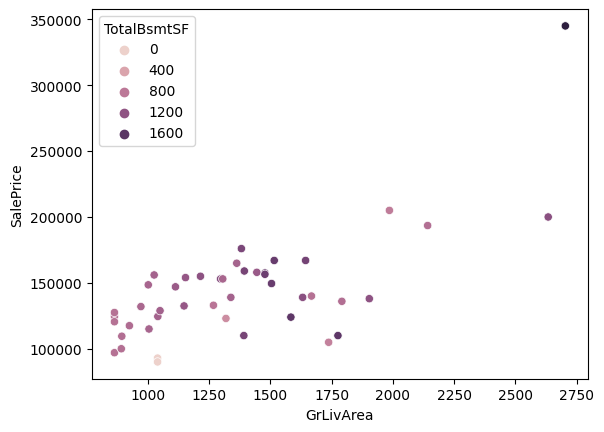

In [9]:
pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_X()
correct_nan(X)
# Verifico che non ci siano errori di imputazione
# 1. Valori categorici non previsti
# 2. Valori numerici evidentemente troppo grandi o troppo piccoli
# 3. Somme sbagliate
field_ft = 'SaleCondition'
#print(X[field_ft].value_counts().sort_index())


#Alcuni dati sembrano decisamente errati ed ingiustificati!!
#1299, 524 già conosciuti
X.drop([1299,524], inplace = True, errors='ignore')


#X.describe()
#field = 'a'
#X[field] = X[field_ft] #* 0.3048 #conversione in metri

# Calcolare valore massimo, minimo e medio in metri
#max_value = X[field].max()
#min_value = X[field].min()
#mean_value = X[field].mean()

#print(f'max_value: {max_value}')
#print(f'min_value: {min_value}')
#print(f'mean_value: {mean_value}')

# Correzioni puntuali
# Id 333 --> BsmtFinType2 = NA non ha senso, per convenzione lo mettiamo uguale a BsmtFinType1
X['BsmtFinType2'].iloc[332] = X['BsmtFinType1'].iloc[332]
# Id 949 --> BsmtExposure = NA non ha senso, forse meglio No
X['BsmtExposure'].iloc[948] = 'No'


# Anno di vendita, anno di rimodernamento, anno di costruzione possono essere ridotti come dimensionalità?


# Controlli basement: se c'è un NA da qualche parte deve evincersi che il basement non esist
#X['BsmtCheckSum'] = X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['BsmtUnfSF']
#basement = X[X.columns[X.columns.str.contains('Bsmt')]]
#basement[basement.isin(['NA']).any(axis=1)] # Righe in cui esiste almeno un NA
#basement[basement['BsmtCheckSum']!=basement['TotalBsmtSF']] # OK!!!

#fireplace = X[X.columns[X.columns.str.contains('Fire')]]
#fireplace[(fireplace['FireplaceQu']=='NA') & (fireplace['Fireplaces']>0)] #OK

# Controlli garage OK!!
#garage = X[X.columns[X.columns.str.contains('Garage')]]
# Verifico la congruenza dove il garage non esiste
#garageCategories = garage.select_dtypes(include=['object']).columns.to_list()
#garage[(garage[garageCategories].isin(['NA']).any(axis=1)) & (garage['GarageCond']!='NA')]
#garage[(~garage[garageCategories].isin(['NA']).any(axis=1)) & (garage['GarageArea']==0)]

# controlli Liv area OK!!!
#livArea = X[['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']]
#livArea['ControlArea'] = livArea[['1stFlrSF','2ndFlrSF','LowQualFinSF']].sum(axis=1)
#livArea[livArea['ControlArea']!=livArea['GrLivArea']]

# Campi controllo
Controllo = X[['GarageType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'SaleType', 
               'Neighborhood', 'SalePrice', 'TotRmsAbvGrd','SaleCondition', 'GarageCars','YrSold', 'LotArea', 'BldgType',
               'ExterQual', 'ExterCond','TotalBsmtSF']]


# Mi aspetto che il prezzo sia innanzitutto proporzionale alla livArea. Calcolo il ratio e vedo quanto varia
X['GarageTypeControllo'] = X['GarageType']
X['QualityControllo'] = X['OverallQual']
X['YearBuiltControllo'] = X['YearBuilt']
X['NeighborhoodControllo'] = X['Neighborhood']
X['SalePriceControllo'] = X['SalePrice']
X['AreaControllo'] = X['GrLivArea']
X['livPricePerAreaRatio'] = X['SalePrice']/X['GrLivArea']


X['livPricePerAreaRatio'].describe()
normalRatio = X[X['livPricePerAreaRatio']<=139]
aboveRatio1 = X[X['livPricePerAreaRatio']>139]
#aboveRatio1.describe()
aboveRatio2 = X[X['livPricePerAreaRatio']>169]


pd.reset_option('display.max_columns')
pd.set_option('display.max_columns', None)
#normalRatio[normalRatio['SaleType']=='New'].sort_values(by='livPricePerAreaRatio')
normalRatio[(normalRatio['YearBuilt']<1940) & 
            (normalRatio['SaleCondition']=='Normal') & 
            (normalRatio['AreaControllo']<1000)].sort_values(by=['Neighborhood','livPricePerAreaRatio']).head(30)

#Street	Alley	LotShape	LandContour	Utilities	LotConfig	LandSlope sembrano non essere importanti
# OverallQual è importantissimo, YearBuilt e OverallCond anche. Molto meno YearRemodAdd che sembra essere legato alla fine con OverallCond
# Il garage anche sembra essere molto importante: da verificare
# Numero di camere potrebbe anche non esserlo
# GrLivArea ovviamente è importante. Non sembra essere importante se la casa è su livelli diversi.
# Quindi lascerei GrLivArea e LowQualFinSF e cancellerei 1stFlrSF e 2ndFlrSF e farei PCA 
# SaleType sembra importante: soprattutto se new
# YrSold non sembra che abbia tutta questa importanza
# YearRemodAdd può essere importante per le vecchie costruzioni
# Foundation potrebbe essere legato a YearBuilt come anche altre features come Neighborhood
# Lotto potrebbe non avere grossa valenza
# SaleCondition può avere indicazioni molto importanti per giustificare grosse deviazioni
# La presenza del garage è molto importante sulle piccole cifre
# GarageYrBlt potrebbe non essere così imporante: chiaramente se una casa è molto antica c'è un momento in cui hanno costruito un garage
# GarageType è importante
# GarageCars in certe condizioni sembra davvero importante
# TotRmsAbvGrd sembra importante
# BldgType importante per distinguere
# Il porch possiamo pensare di sommare tutte le aree, non credo che ci siano grosse differenze di prezzo se aperto o chiuso


#Alcuni dati sono decisamente errati ed ingiustificati!!
#1299, 524 già conosciuti
#706 non mi sembra a posto

# Sto cercando case che abbiano una livPricePerAreaRatio che esca dalla deviazione standard 
# nel quartiere in cui è situata.
# C'è da considerare che una casa piccola può avere una ratio più alta di una grande perchè comunque
# una abitazione non costa meno di un valore minimo
# La presenza di un garage può influire quindi separerei case con garage da case senza garage --> GarageType
# Posso prendere il valore medio al metroquadro per il neighboorhood e lo moltiplico per l'area minima.
# La differenza tra il valore trovato ed il sale price della casa con area minima dovrebbe essere il minimo di dimora
# Distinguere tra case con Garage e senza garage
# Distinguere tra case ristrutturate e non
# In alcuni casi se la ratio non torna potrebbe essere coinvolto del terreno
# Sembra che in alcune zone i prezzi si siano alzati negli anni quindi posso utilizzare l'informazione di yearsold
# Posso pensare di inserire una penalizzazione in base alla condizione della casa 
scatter = Controllo[(Controllo['Neighborhood']=='NAmes') & (Controllo['YrSold']==2009)]
#scatter
sns.scatterplot(data = scatter, x='GrLivArea', y='SalePrice', hue='TotalBsmtSF')

In [10]:
# Isolo i dati sul grafico
scatter[(scatter['GrLivArea'].between(2500,3000)) & (scatter['SalePrice']>260000) ].sort_values(by='SalePrice')


,GarageType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,SaleType,Neighborhood,SalePrice,TotRmsAbvGrd,SaleCondition,GarageCars,YrSold,LotArea,BldgType,ExterQual,ExterCond,TotalBsmtSF
Id,,,,,,,,,,,,,,,,,,
643,Attchd,8,7,1972,1995,2704,WD,NAmes,345000,9,Normal,2,2009,13860,1Fam,Gd,TA,1952


In [11]:
scatter[(scatter['GrLivArea'].between(2500,3000)) & (scatter['SalePrice']<260000)].sort_values(by='SalePrice', ascending=False)


,GarageType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,SaleType,Neighborhood,SalePrice,TotRmsAbvGrd,SaleCondition,GarageCars,YrSold,LotArea,BldgType,ExterQual,ExterCond,TotalBsmtSF
Id,,,,,,,,,,,,,,,,,,
1351,Detchd,5,5,1969,1969,2634,WD,NAmes,200000,12,Normal,4,2009,11643,Duplex,TA,TA,1248


In [12]:
#Si potrebbe effettuare un clustering sulle coordinate dei quartieri
# Coordinate N,W
coordinates={}
coordinates['Blmngtn']= [42.0220 , 93.6170]
coordinates['Blueste']=[42.0145 , 93.6130]
coordinates['BrDale']= [42.0188 , 93.6002 ]
coordinates['BrkSide']=[42.0213 , 93.6178]
coordinates['ClearCr']= [42.0240 , 93.6230] 
coordinates['CollgCr']= [42.0315 , 93.6157] 
coordinates['Crawfor']= [42.0236 , 93.6229]
coordinates['Edwards']= [42.0212 , 93.6095] 
coordinates['Gilbert']= [42.0420 , 93.6378]
coordinates['IDOTRR']=[42.0330 , 93.5900] 
coordinates['MeadowV']= [42.0140 , 93.6155]
coordinates['Mitchel']= [42.0332 , 93.6053] 
coordinates['Names']= [42.0270 , 93.6145] 
coordinates['NoRidge']=[42.0290 , 93.5988]
coordinates['NPkVill']= [42.0278 , 93.5867]
coordinates['NridgHt']=[42.0255 , 93.5935 ]
coordinates['NWAmes']= [42.0312 , 93.6293]
coordinates['OldTown']=[42.0293 , 93.6171]
coordinates['SWISU']= [42.0214 , 93.6178] 
coordinates['Sawyer']= [42.0080, 93.6290 ]
coordinates['SawyerW']=[42.0065 , 93.6280]
coordinates['Somerst']= [42.0240 , 93.6050] 
coordinates['StoneBr']= [42.0290 , 93.6160 ]
coordinates['Timber']= [42.0350 , 93.5990] 
coordinates['Veenker']= [42.0358 , 93.6340]

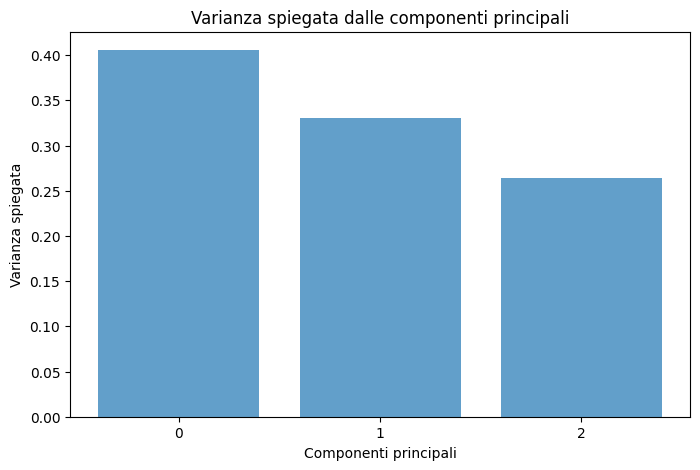

           PC1       PC2       PC3
0    -1.314419 -0.413600  0.308434
1     0.758298  0.005327 -0.371241
2    -1.222655 -0.366111  0.440745
3    -0.975266 -0.320800  0.333307
4    -1.132118 -0.217477  1.142400
...        ...       ...       ...
1455 -0.889782 -0.319083  0.217963
1456  2.164813  0.626341  1.057049
1457 -1.216197 -0.197074  1.379810
1458  0.439187 -0.135569 -0.695292
1459  0.747892  0.000732 -0.381808

[1460 rows x 3 columns]


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_X()
correct_nan(X)
#pca_flds = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']
pca_flds = ['1stFlrSF','2ndFlrSF','LowQualFinSF']
#pca_flds = ['FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'] # 3
#pca_flds = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'] # 4

X = X[pca_flds]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X[pca_flds])

#scaled_data = pd.get_dummies(X, columns=pca_flds, drop_first=True)
pca = PCA()
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7)
plt.xlabel('Componenti principali')
plt.ylabel('Varianza spiegata')
plt.title('Varianza spiegata dalle componenti principali')
plt.xticks(range(len(explained_variance)))
plt.show()

pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(len(pca_data[0]))])
print(pca_df)


Index(['ExterCond', 'ScreenPorch', 'Heating', 'LotConfig', 'RoofStyle',
       'Functional', 'BsmtHalfBath', 'LowQualFinSF', 'RoofMatl', 'MiscFeature',
       'MiscVal', 'LandSlope', '3SsnPorch', 'YrSold', 'BsmtFinSF2',
       'Condition2', 'Street', 'Utilities', 'PoolArea', 'PoolQC', 'MoSold'],
      dtype='object')


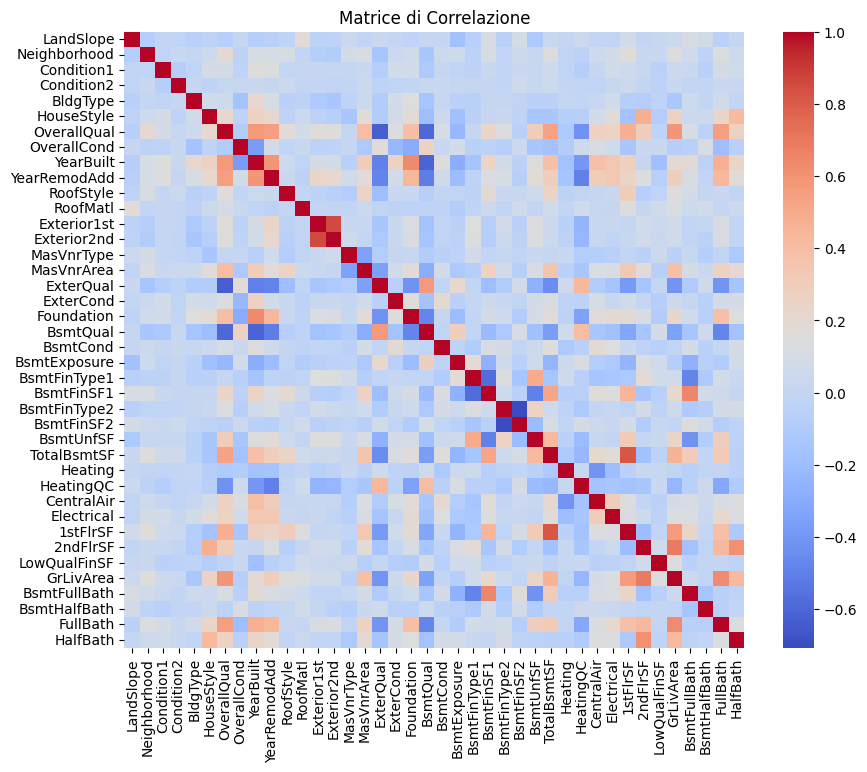

In [14]:
from sklearn.feature_selection import mutual_info_regression

pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_X()
correct_nan(X)

def handle_mi_scores(X,y):
    discrete_features = X.dtypes == int
#    print(discrete_features)
    def make_mi_scores(X, y, discrete_features):
        mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
        return mi_scores
    
    mi_scores = make_mi_scores(X, y, discrete_features)
    mi_scores[::3]  # show a few features with their MI scores
    
    return mi_scores

y = X.pop('SalePrice')
label_encoders = {}

cat_features = [item for item in X.columns if X[item].dtype not in('int64','float64')]

for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

for col in cat_features:
    X[col].fillna(X[col].mode()[0], inplace=True)

scores = handle_mi_scores(X,y)

def plot_mi_scores(scores):
    # Assicurati che 'scores' sia in un formato corretto (Series o DataFrame)
    if not isinstance(scores, (pd.Series, pd.DataFrame)):
        raise ValueError("Input scores must be a pandas Series or DataFrame")
        
    scores = scores.sort_values(ascending=True)  # Ordina i punteggi
    width = np.arange(len(scores))  # Crea un array per le posizioni delle barre
    ticks = list(scores.index)  # Ottieni i nomi delle feature per le etichette delle y

    plt.barh(width, scores)  # Crea il grafico a barre orizzontali
    plt.yticks(width, ticks)  # Imposta le etichette delle y
    plt.title("Mutual Information Scores")  # Titolo del grafico
    plt.xlabel("Mutual Information Score")  # Etichetta asse x
    plt.ylabel("Features")  # Etichetta asse y
    plt.tight_layout()  # Ottimizza la disposizione del grafico
    plt.show()  # Mostra il grafico


#plot_mi_scores(scores)
print(scores[scores<0.02].index)

fields_to_correlate = X.iloc[:,10:50].columns

# Supponiamo che X sia il tuo DataFrame con le feature
correlation_matrix = X[fields_to_correlate].corr()

# Visualizza la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Matrice di Correlazione")
plt.show()

# GarageCars e garageArea sono fortemente correlate: ha senso mantenerne solamente una, garageArea sembra che dia
# una indicazione più fine
# 'GarageCond','GarageQual' son correlati, ha senso creare dei cluster


In [15]:
pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_X()
X[[ 'LowQualFinSF','1stFlrSF', '2ndFlrSF', 'GrLivArea']][X['LowQualFinSF']>0]

,LowQualFinSF,1stFlrSF,2ndFlrSF,GrLivArea
Id,,,,
52,360,816,0,1176
89,513,1013,0,1526
126,234,520,0,754
171,528,854,0,1382
186,572,1518,1518,3608
188,144,808,704,1656
198,392,1360,1360,3112
199,371,929,929,2229
264,390,926,0,1316


**Cluster**

In [16]:
from sklearn.cluster import KMeans
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(X[['GarageCond','GarageQual']]).toarray()

# Creare un DataFrame con i dati codificati
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Eseguire il clustering usando K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(encoded_df)

# Aggiungere i cluster al DataFrame originale
X['Garage_QualityConditionCluster'] = clusters

X['Garage_QualityConditionCluster'].value_counts()

Garage_QualityConditionCluster
0    1307
1      81
2      57
3      15
Name: count, dtype: int64

**Variance Inflation Factor (VIF)**
Il VIF è una misura che quantifica quanto l'inflazione della varianza di un coefficiente di regressione sia dovuta alla collinearità di una variabile con le altre. Generalmente, un VIF superiore a 5 o 10 indica multicollinearità.



In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_X()
correct_nan(X)
X.pop('SalePrice')
label_encoders = {}

cat_features = [item for item in X.columns if X[item].dtype not in('int64','float64')]

for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

for col in cat_features:
    X[col].fillna(X[col].mode()[0], inplace=True)


# Calcola il VIF per ogni feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data[vif_data['VIF']>10].sort_values(by='VIF', ascending=False))
print(len(X.columns))

          Feature           VIF
37    TotalBsmtSF           inf
45      GrLivArea           inf
44   LowQualFinSF           inf
43       2ndFlrSF           inf
42       1stFlrSF           inf
36      BsmtUnfSF           inf
35     BsmtFinSF2           inf
33     BsmtFinSF1           inf
76         YrSold  4.255641e+04
18      YearBuilt  3.195773e+04
19   YearRemodAdd  2.570815e+04
71         PoolQC  2.368276e+03
4          Street  2.879553e+02
73    MiscFeature  1.627956e+02
53   TotRmsAbvGrd  9.019505e+01
16    OverallQual  8.004152e+01
63     GarageCond  7.552700e+01
13     Condition2  6.695802e+01
62     GarageQual  5.721532e+01
34   BsmtFinType2  5.235971e+01
17    OverallCond  5.105860e+01
58    GarageYrBlt  5.100884e+01
54     Functional  4.453163e+01
60     GarageCars  4.295898e+01
51   KitchenAbvGr  4.191367e+01
22    Exterior1st  4.083059e+01
26      ExterQual  3.895566e+01
23    Exterior2nd  3.876290e+01
50   BedroomAbvGr  3.584831e+01
61     GarageArea  3.407108e+01
27      

La Principal Component Analysis (**PCA**) è una tecnica di riduzione della dimensionalità utilizzata per trasformare un set di variabili correlate in un nuovo set di variabili non correlate, chiamate componenti principali. Le prime componenti principali catturano la maggior parte della varianza presente nei dati. 

In [18]:
pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_df()
fields_to_watch = ['SalePrice', 'OverallQual', 'OverallCond', 'ExterQual', 'GrLivArea', 'LowQualFinSF', 
                   'YearBuilt', 'SaleType', 'GarageCars', 'GarageType']

X = X[fields_to_watch]
X.sort_values(by='YearBuilt', ascending=False).head(30)

,SalePrice,OverallQual,OverallCond,ExterQual,GrLivArea,LowQualFinSF,YearBuilt,SaleType,GarageCars,GarageType
Id,,,,,,,,,,
379,394432,9,2,Gd,1856,0,2010,New,3,Attchd
158,269500,8,5,Gd,1968,0,2009,New,3,BuiltIn
645,370878,9,5,Ex,1766,0,2009,New,3,Attchd
763,215200,7,5,TA,1547,0,2009,Con,2,Attchd
413,222000,7,5,Ex,1478,0,2009,New,2,Attchd
915,173733,6,5,Gd,1224,0,2009,New,2,Detchd
573,224500,7,5,TA,1692,0,2009,New,2,Attchd
212,186000,6,5,TA,1212,0,2009,WD,2,Attchd
1218,229456,8,5,Gd,1314,0,2009,New,2,Attchd


In [19]:
##### import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import FunctionTransformer


pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_df()

######################################################################################

## OCCORRE TRASFORMARE IN STRINGA TUTTI I CAMPI CHE DI FATTO SONO CATEGORIE

######################################################################################

# Escludiamo tutti i campi che non possono essere indicativi
irrilevant_cols = get_irrilevant_cols(X, perc_treshold=86)
#print(irrilevant_cols)
fields_ok = [col for col in X.columns if col not in irrilevant_cols]
X = X[fields_ok]
# Pulizia df: noise, irrilevant cols, outliers 
# Delete noise 524, 1299 
# 198, 636, 1032, 1174
#delete_noise(X, [524, 1299]) #--> sono totalmente ingiustificati
X.reset_index(drop=True)

y = X.pop('SalePrice')


# Seleziona le feature che desideri utilizzare (assicurati che questi siano i nomi corretti)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

numeric_features = [item for item in X.columns if X[item].dtype in('int64','float64')]
all_category_features = [item for item in X.columns if item not in numeric_features]

# Pipeline per la codifica One-Hot
#onehot_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore')),
#])

# Pipeline per la codifica delle etichette
label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('cat_label', FunctionTransformer(label_encode, validate=False))
])


transformers=[]
#untransformed_features = ['price_mean_nbrhd','cluster_GarageQualCond','cluster_Sale','cluster_Exterior','cluster_Lot']# Sono le feature di target encoding ed i cluster per esempio

#transformers.append(('onehot', onehot_transformer, features_OneHot))
transformers.append(('label', label_transformer, all_category_features))
transformers.append(('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                            ('scaler', StandardScaler())]), numeric_features))
#transformers.append(('pca_Porch', Pipeline([
#            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
#            ('scaler', StandardScaler()),
#            ('pca', PCA(n_components=4)),
#            ('remove_columns', FunctionTransformer(remove_original_columns, validate=False))  
#]), pca_Porch))
#transformers.append(('passthrough', 'passthrough', untransformed_features))  # Passa le feature non trattate

preprocessor = ColumnTransformer(transformers=transformers)  

# Clustering
#clustering_Lot = Clustering(features_to_cluster=cluster_Lot, n_clusters=8, cluster_name='cluster_Lot', fill_value='NA') 

model = XGBRegressor()

# Pipeline finale
pipeline = Pipeline(steps=[
#    ('target_encoder', TargetEncoder(weight=0.7)),
#    ('clustering_gar', clustering_Garage),  
    ('preprocessor', preprocessor),
    ('model', model)
])

## RANDOM SEARCH
#param_dist = {
#    'model__n_estimators': np.arange(100, 150, 10),
#    'model__max_depth': np.arange(10, 20),
#    'model__min_samples_split': np.arange(2, 10),
#    'model__min_samples_leaf': np.arange(1, 5)
#}

# Creare l'oggetto RandomizedSearchCV
#random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
#                                   scoring='neg_mean_squared_error', n_iter=100,
#                                   cv=5, n_jobs=-1, verbose=2, random_state=42)

# Eseguire la ricerca
#random_search.fit(X_train, y_train)

# Mostrare i migliori parametri
#print("Migliori parametri:", random_search.best_params_)
#print("Miglior punteggio:", random_search.best_score_)

# Cross validation
# Multiply by -1 since sklearn calculates *negative* MAE
#scores = -1 * cross_val_score(pipeline, X, y,
#                              cv=5,
#                              scoring='neg_mean_absolute_error')

#print("MAE scores:\n", scores)

# SENZA CROSS
# Fit e previsione
pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

# Calcolo della MAE
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


#X_train_encoded = encoder.fit_transform(X_train, y_train)

# Aggiungi il nuovo campo di encoding anche ai dati di test e inferenza
#X_test_encoded = encoder.transform(X_test)
#validation_data = pd.DataFrame({'Neighborhood': ['A', 'E']})  # 'E' è sconosciuto
#validation_encoded = encoder.transform(validation_data)

#inferenced_data = pd.DataFrame({'Neighborhood': ['A', 'E']})
#inferenced_encoded = encoder.transform(inferenced_data)
# [17989.16509925 17635.3600564  17921.45573071 16318.42176247 19576.79822101] BASE
# [16505.81516935 18995.93069023 17495.46746233 15562.60597304 17666.75046929]
# [16379.85285748 18059.44012411 18324.48427671 15149.93785626 18401.57595722]
# After Outliers handling
# [13766.04136004 12643.31778706 13143.98610186 13504.49152035 14066.56898189]
# After feature selection

# BEST With all fields Mean Absolute Error (MAE): 18731.190362799658
# escludendo colonne irrilevanti al 86 come threshold :
# Mean Absolute Error (MAE): 18629.45419520548
# Escludendo [524, 1299]
# Mean Absolute Error (MAE): 17339.345676369863


Mean Absolute Error (MAE): 17379.01329730308


In [20]:
X['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [21]:
#X[X.index==54]
X['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [22]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000


**ISOLAMENTO OUTLIERS**
Occorre trovare il giusto mezzo tra isolamento outliers e impoverimento dati di training
Può essere un'idea innanzitutto eliminare i campi poco rappresentativi
Poi possiamo anche contare quali sono gli outliers più ricorrenti nelle varie features, quindi il metodo
dovrà restituire l'indice e la feature per cui è outlier. 
La cosa migliore è quindi utilizzare un dictionary

**get_irrilevant_cols CONTEGGIO VALORI per individuare i campi meno rappresentativi**

In [23]:
import pandas as pd
import numpy as np

pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_X()
# Delete noise 524, 1299 
#indices_to_remove = [524, 1299]
#X.drop(indices_to_remove, inplace = True, errors='ignore')
#X.reset_index(drop=True)
# MSSubClass deve essere gestito come una stringa perchè di fatto è una categoria
X['MSSubClass'] = X['MSSubClass'].astype(str)

def get_irrilevant_cols(X, perc_treshold):
    row_count = X.shape[0]
    cols_to_delete = []
    for col in X.columns:
        values_counting = X[col].value_counts().reset_index().rename(columns={'index': 'val', col: 'counts'})
        top_values = values_counting.sort_values(by='count', ascending=False).head(2)
        perc_top= (top_values.iloc[0,1]/row_count)*100
        if(perc_top>perc_treshold):
            #print(f'percentage top:{perc_top}')
            #print(f"Top values for column '{col}'. Not nan values:{X[col].count()}:")
            #print(top_values)
            cols_to_delete.append(col)

    return cols_to_delete

# DEVO IDENTIFICARE QUALI SONO I CAMPI DA ESCLUDERE PER IL CALCOLO DEGLI OUTLIERS
# OPPURE ISOLO QUELLI CHE SONO I CAMPI PIU' EFFICACI E CALCOLO SU QUELLI
del_fields = get_irrilevant_cols(X, perc_treshold=90)
#print(f'campi irrilevanti:{del_fields}')

def find_outliers(X, col, quantile_param):
    if X[col].dtype in ['int64', 'float64']:  # Se la colonna è numerica
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if lower_bound<0:
            lower_bound=0
        print(f'lower and upper bound for {col}: {lower_bound} : {upper_bound}')
        outlier_indices = X[(X[col] < lower_bound) | (X[col] > upper_bound)].index
    
    elif X[col].dtype == 'object':  # Se la colonna è categoriale
        # Ottieni le frequenze delle categorie
        freq = X[col].value_counts(normalize=True)
        # Identifica le categorie che compaiono meno del 5% delle volte
        rare_categories = freq[freq < 0.05].index
        print(f'rare_categories for {col}: {rare_categories}')
        
        outlier_indices = X[X[col].isin(rare_categories)].index
    
    else:
        raise ValueError("Tipo di dati non supportato per la colonna: " + str(X[col].dtype))
    
    return outlier_indices.to_numpy()

def delete_outliers(X, outliers):
    for key in outliers:
        X.drop(key, inplace = True, errors='ignore')

#    X.reset_index(drop=True)
    return X
outliers_indexes = {}
outliers_for_feature = {}
quantile_tweak = 1.5

print(f'del_fields:{del_fields}')

fields_to_exclude = del_fields
fields_to_exclude.append('MSSubClass')
fields_to_exclude.append('Neighborhood')
fields_to_exclude.append('YearRemodAdd')
fields_to_exclude.append('YrSold')
fields_to_exclude.append('YearBuilt')
for col in X.columns:
    if col not in fields_to_exclude:
        outliers_for_feature = find_outliers(X, col, quantile_tweak)
        for value in outliers_for_feature:
            if value in outliers_indexes:
                outliers_indexes[value].append(col)
            else:
                outliers_indexes[value] = [col]

outliers_size={}
for key, value in outliers_indexes.items():
    outliers_size[key] = len(value)
    
outliers_df = pd.DataFrame(list(outliers_size.items()), columns=['Chiave', 'Lunghezza'])
outliers_df.sort_values(by='Lunghezza', ascending=False)

#print(f'rows before:{X.shape[0]}')
#delete_outliers(X, outliers_df[outliers_df['Lunghezza']>7]['Chiave'])
# Riindicizzo
X.reset_index(drop=True)
#print(f'rows after:{X.shape[0]}')


#X['TotalLivingArea'] = X['1stFlrSF'] + X['2ndFlrSF'] + X['GrLivArea'] 
#X['TotalArea'] = X['TotalLivingArea'] + 0.4*( X['TotalBsmtSF']+ 0.7*X['GarageArea']+ 0.5*(X['EnclosedPorch']+ X['OpenPorchSF'])+ np.sqrt(X['WoodDeckSF'])+np.log(X['LotArea']))
#X['PricePerArea'] = X['SalePrice']/X['TotalLivingArea']
#sns.scatterplot(data=X, x='TotalArea',y='SalePrice', hue= 'OverallQual', color='b')
outliers_df[outliers_df['Lunghezza']>8].sort_values(by='Lunghezza', ascending=False)['Chiave'].to_list()

#X.iloc[152]

del_fields:['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
rare_categories for MSZoning: Index(['FV', 'RH', 'C (all)'], dtype='object', name='MSZoning')
lower and upper bound for LotFrontage: 27.5 : 111.5
lower and upper bound for LotArea: 1481.5 : 17673.5
rare_categories for Alley: Index([], dtype='object', name='Alley')
rare_categories for LotShape: Index(['IR2', 'IR3'], dtype='object', name='LotShape')
rare_categories for LandContour: Index(['Bnk', 'HLS', 'Low'], dtype='object', name='LandContour')
rare_categories for LotConfig: Index(['FR2', 'FR3'], dtype='object', name='LotConfig')
rare_categories for Condition1: Index(['Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'], dtype='object', name='Condition1')
rare_categories for BldgType: Index(['Duplex', 'Twnhs', '2fmCon'], dtype='obje

[1299, 524, 770, 636, 198, 314, 186, 247, 637, 826, 692, 534, 587, 706]